# Data processing
In this part we filtered out 15132 genes that are detected in less than 3 cells, and save it as whole data set((6648 cells, 17154 genes).

In [3]:
!pip install scanpy
import numpy as np
import pandas as pd
import scanpy as sc
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

  Using cached matplotlib-3.8.0-cp39-cp39-macosx_10_12_x86_64.whl (7.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/V

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.8.1 pandas==1.2.4 scikit-learn==1.1.1 statsmodels==0.14.0rc0 python-igraph==0.10.4 pynndescent==0.5.10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [4]:
maledataRR = sc.read_mtx('male.mtx')
femaledataRR = sc.read_mtx('female.mtx')
fff=pd.read_csv('female.tsv',sep='\t',header=None)
mmm=pd.read_csv('male.tsv',sep='\t',header=None)
fff
frames = [fff, mmm]
name=pd.concat(frames,axis=0)
femaledata=femaledataRR.T
maledata=maledataRR.T
femaledata.var.index = fff[1]
maledata.var.index = mmm[1]
femaledata.var
femaledata.obs_names = [f"Cell_{2685+i:d}" for i in range(femaledata.n_obs)]
maledata.obs_names = [f"Cell_{i:d}" for i in range(maledata.n_obs)]

In [5]:
maledata
ct = np.random.choice(["1"], size=(maledata.n_obs,))
maledata.obs["gender"] = pd.Categorical(ct)  # Categoricals are preferred for efficiency
maledata.obs
femaledata
ct = np.random.choice(["0"], size=(femaledata.n_obs,))
femaledata.obs["gender"] = pd.Categorical(ct)  # Categoricals are preferred for efficiency
femaledata.obs

gender
Cell_2685      0
Cell_2686      0
Cell_2687      0
Cell_2688      0
Cell_2689      0
...          ...
Cell_6643      0
Cell_6644      0
Cell_6645      0
Cell_6646      0
Cell_6647      0

[3963 rows x 1 columns]

  Using cached matplotlib-3.1.3-cp39-cp39-macosx_10_9_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.3 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
normalizing counts per cell
    finished (0:00:00)


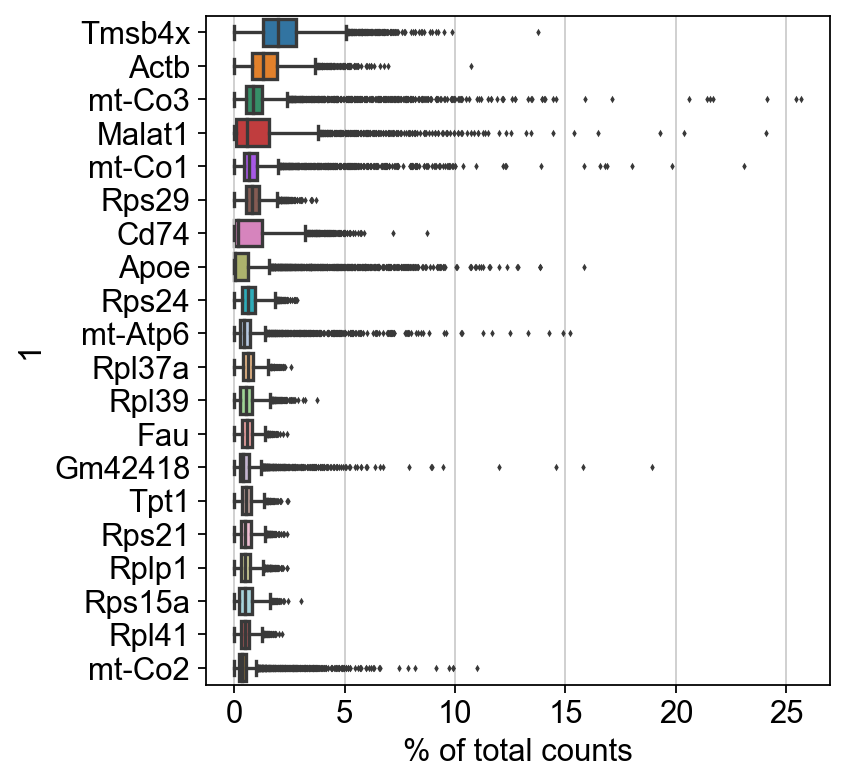

filtered out 15132 genes that are detected in less than 3 cells


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


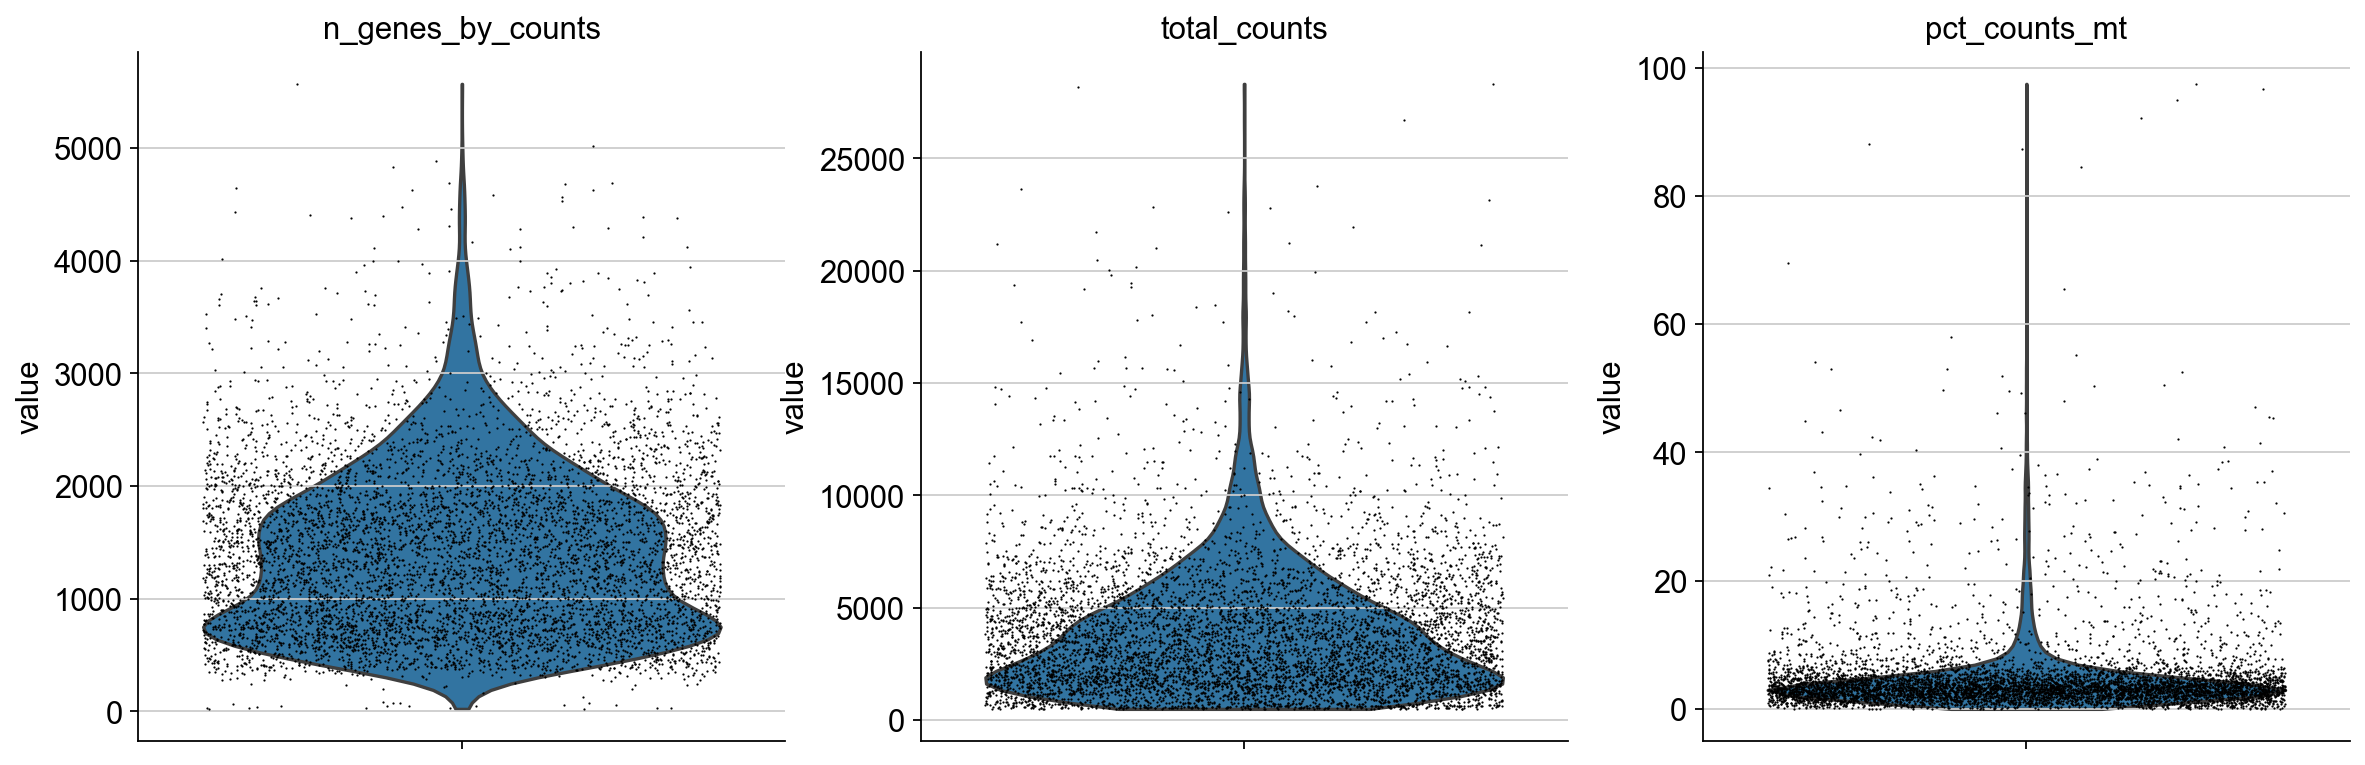

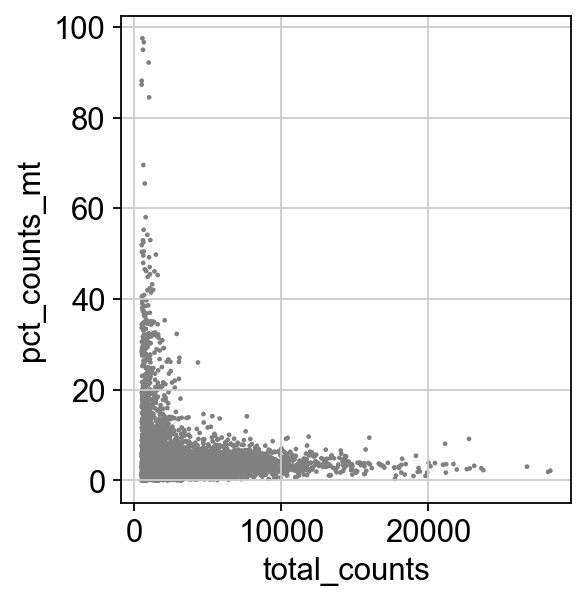

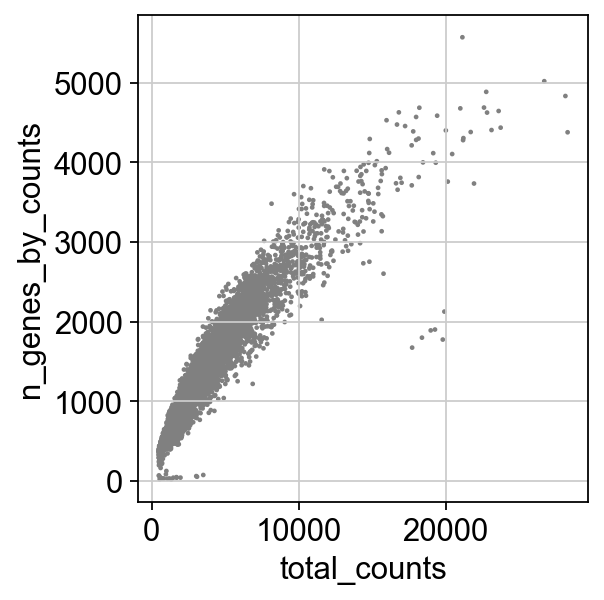

In [6]:
import anndata
fw=femaledata.X.todense()
maledata
fr=maledata.X.todense()
!pip install AnnData
import anndata
x_combined = np.concatenate([fr,fw],axis=0)#male在先
adata_combined = anndata.AnnData(x_combined)  #用新的np array重新构造anndata
adata_combined.var.index = fff[1]
adata_combined.obs_names = [f"Cell_{i:d}" for i in range(adata_combined.n_obs)]
c11 = np.ones(maledata.n_obs)
c22= np.zeros(femaledata.n_obs)
# femaledata.obs["gender"] = pd.Categorical(ct)  # Categoricals are preferred for efficiency
# femaledata.obs
joined_list = [*c11, *c22]
adata_combined.obs["gender"] = pd.Categorical(joined_list)  # Categoricals are preferred for efficiency
adata_combined.obs
adata=adata_combined
adata.var.index=fff[1]
!pip install matplotlib==3.1.3
adata.X=np.asarray(adata.X)
sc.pl.highest_expr_genes(adata, n_top=20, )
adata.var.index.name ="n"
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.var_names_make_unique()
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


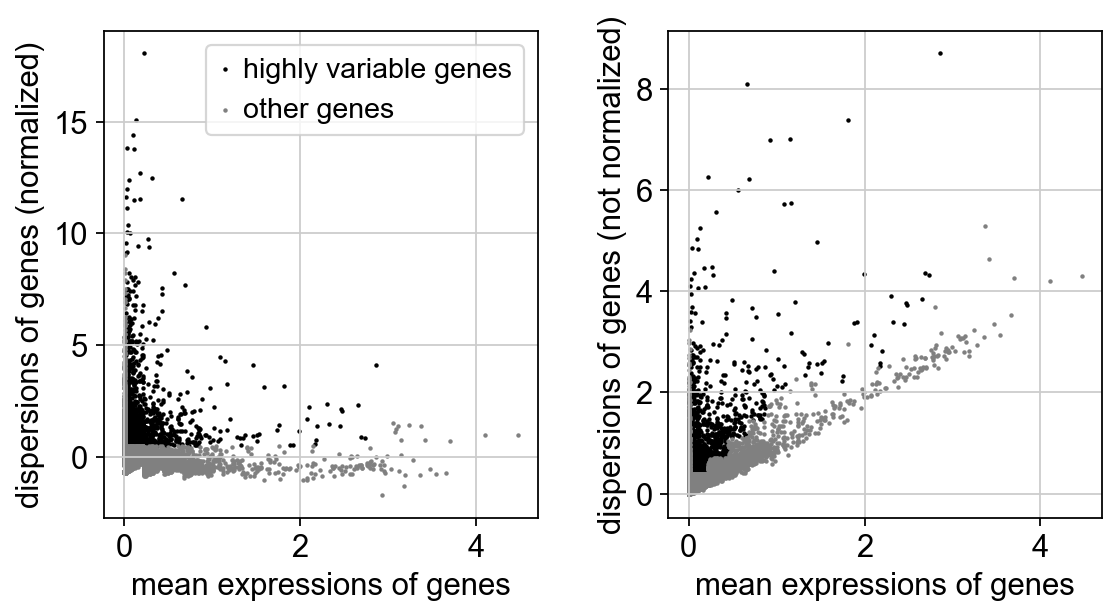

In [7]:
sc.pp.log1p(adata)
# sc.pp.log1p(maledata)
# sc.pp.highly_variable_genes(femaledata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
 

In [8]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


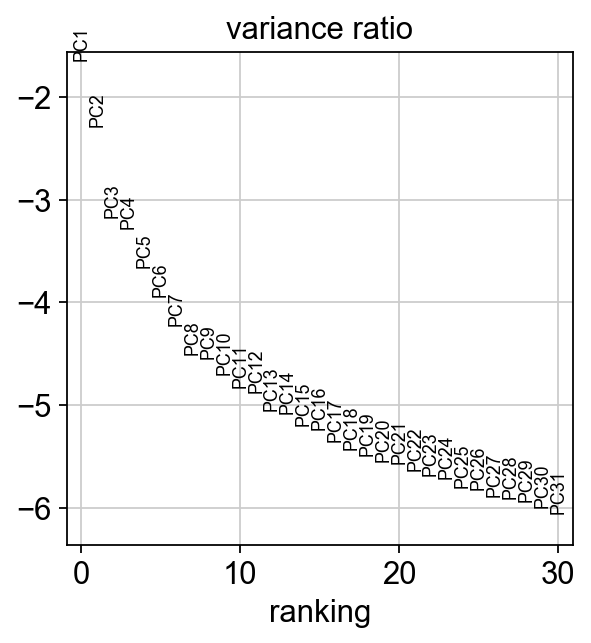

In [9]:
sc.pl.pca_variance_ratio(adata, log=True)

In [10]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [11]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


In [12]:
adata.layers["log_transformed"] = np.log1p(adata.X)
#maledata.layers["log_transformed"] = np.log1p(maledata.X)

rc=adata.to_df(layer="log_transformed")
rc["y"] = pd.Categorical(joined_list)

In [13]:
import numpy as np
import scanpy as sc
import pandas as pd
#import gdown

from anndata.experimental.multi_files import AnnCollection

from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA

import warnings
warnings.simplefilter(action="ignore", category=pd.core.common.SettingWithCopyWarning)

In [14]:
training_data = rc.sample(frac=0.6, random_state=25)
testing_data = rc.drop(training_data.index)
Y_train=training_data["y"]
X_train=training_data.drop(["y"],axis=1)
Y_test=testing_data["y"]
X_test=testing_data.drop(["y"],axis=1)


randomly choosing training data and testing data with proportion of 6:4

In [15]:
testing_data

n             Sox17  Mrpl15    Lypla1     Tcea1  Gm16041  Atp6v1h    Rb1cc1  \
Cell_3     0.000000     0.0  0.000000  0.526589      0.0      0.0  0.000000   
Cell_8     0.000000     0.0  0.000000  0.526589      0.0      0.0  0.000000   
Cell_10    0.000000     0.0  0.000000  0.869742      0.0      0.0  0.000000   
Cell_11    0.000000     0.0  0.000000  0.526589      0.0      0.0  0.000000   
Cell_14    0.000000     0.0  0.000000  0.000000      0.0      0.0  0.000000   
...             ...     ...       ...       ...      ...      ...       ...   
Cell_6632  0.526589     0.0  0.741276  0.869742      0.0      0.0  0.000000   
Cell_6633  0.000000     0.0  0.000000  0.000000      0.0      0.0  0.000000   
Cell_6634  0.000000     0.0  0.000000  0.000000      0.0      0.0  0.000000   
Cell_6637  0.000000     0.0  0.000000  0.526589      0.0      0.0  0.526589   
Cell_6641  0.000000     0.0  0.526589  0.000000      0.0      0.0  0.000000   

n          4732440D04Rik  St18    Pcmtd1  ...  AC168977.1  CAAA01118383.1  \
Cell_3          0.000000   0.0  0.526589  ...         0.0        0.000000   
Cell_8          0.000000   0.0  0.000000  ...         0.0        0.000000   
Cell_10         0.526589   0.0  0.000000  ...         0.0        0.526589   
Cell_11         0.000000   0.0  0.000000  ...         0.0        0.000000   
Cell_14         0.000000   0.0  0.000000  ...         0.0        0.000000   
...                  ...   ...       ...  ...         ...             ...   
Cell_6632       0.000000   0.0  0.869742  ...         0.0        0.000000   
Cell_6633       0.000000   0.0  0.000000  ...         0.0        0.000000   
Cell_6634       0.000000   0.0  0.000000  ...         0.0        0.000000   
Cell_6637       0.526589   0.0  0.000000  ...         0.0        0.526589   
Cell_6641       0.000000   0.0  0.000000  ...         0.0        0.000000   

n          AC132444.1  AC132444.5  Csprs     Vamp7  Tmlhe  CAAA01147332.1  \
Cell_3            0.0         0.0    0.0  0.000000    0.0             0.0   
Cell_8            0.0         0.0    0.0  0.000000    0.0             0.0   
Cell_10           0.0         0.0    0.0  0.000000    0.0             0.0   
Cell_11           0.0         0.0    0.0  0.000000    0.0             0.0   
Cell_14           0.0         0.0    0.0  0.000000    0.0             0.0   
...               ...         ...    ...       ...    ...             ...   
Cell_6632         0.0         0.0    0.0  0.526589    0.0             0.0   
Cell_6633         0.0         0.0    0.0  0.000000    0.0             0.0   
Cell_6634         0.0         0.0    0.0  0.000000    0.0             0.0   
Cell_6637         0.0         0.0    0.0  0.526589    0.0             0.0   
Cell_6641         0.0         0.0    0.0  0.000000    0.0             0.0   

n          AC149090.1    y  
Cell_3       0.526589  1.0  
Cell_8       0.000000  1.0  
Cell_10      0.000000  1.0  
Cell_11      0.000000  1.0  
Cell_14      0.000000  1.0  
...               ...  ...  
Cell_6632    0.526589  0.0  
Cell_6633    0.000000  0.0  
Cell_6634    0.000000  0.0  
Cell_6637    0.000000  0.0  
Cell_6641    0.000000  0.0  

[2659 rows x 17154 columns]

In [16]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [17]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import transpose
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [24]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [31]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import scale
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import roc_curve, roc_auc_score

# # Assuming X_train, Y_train, X_test, Y_test are already defined

# # Normalize the data
# nX_train = X_train.copy()
# nX_test = X_test.copy()

# for col in nX_train.columns:
#     nX_train[col] = scale(nX_train[col])
# for col in nX_test.columns:
#     nX_test[col] = scale(nX_test[col])

# # Initialize models
# models = {
#     'SVM': SVC(kernel='linear', random_state=51, probability=True),
#     'RandomForest': RandomForestClassifier(n_estimators=100, random_state=51),
#     'XGBoost': XGBClassifier(random_state=51),
#     'Logistic': LogisticRegression(max_iter=1000, random_state=51)
# }

# # Train models, get top 20 features and plot ROC curve
# feature_importances = {}
# perf = {}
# plt.figure(figsize=(10, 8))
# for model_name, model in models.items():
#     model.fit(nX_train, Y_train)
    
#     if hasattr(model, "predict_proba"):
#         y_test_prob = model.predict_proba(nX_test)[:, 1]
#     else:
#         y_test_prob = model.decision_function(nX_test)

#     if hasattr(model, "feature_importances_"):
#         feature_importances[model_name] = model.feature_importances_
#     elif hasattr(model, "coef_"):
#         feature_importances[model_name] = model.coef_[0]
    
#     fpr, tpr, _ = roc_curve(Y_test, y_test_prob)
#     auroc = roc_auc_score(Y_test, y_test_prob)
#     perf[model_name] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    
#     plt.plot(fpr, tpr, label=f'{model_name} (AUROC = {auroc:.2f})')

# plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

# # Top 20 features for each model
# top_features = {}
# for model_name, importance in feature_importances.items():
#     sorted_idx = np.argsort(importance)[-20:]
#     top_features[model_name] = nX_train.columns[sorted_idx].tolist()
#     print(f"Top 20 features for {model_name}: {top_features[model_name]}")

# # Intersection of top features
# common_features = set(top_features['SVM'])
# for model_name in models.keys():
#     common_features &= set(top_features[model_name])

# print(f"Common features among top 20 of all models: {common_features}")


scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.8.1 pandas==1.2.4 scikit-learn==1.1.1 statsmodels==0.14.0rc0 python-igraph==0.10.4 pynndescent==0.5.10
filtered out 3 cells that have less than 100 genes expressed
filtered out 19261 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)


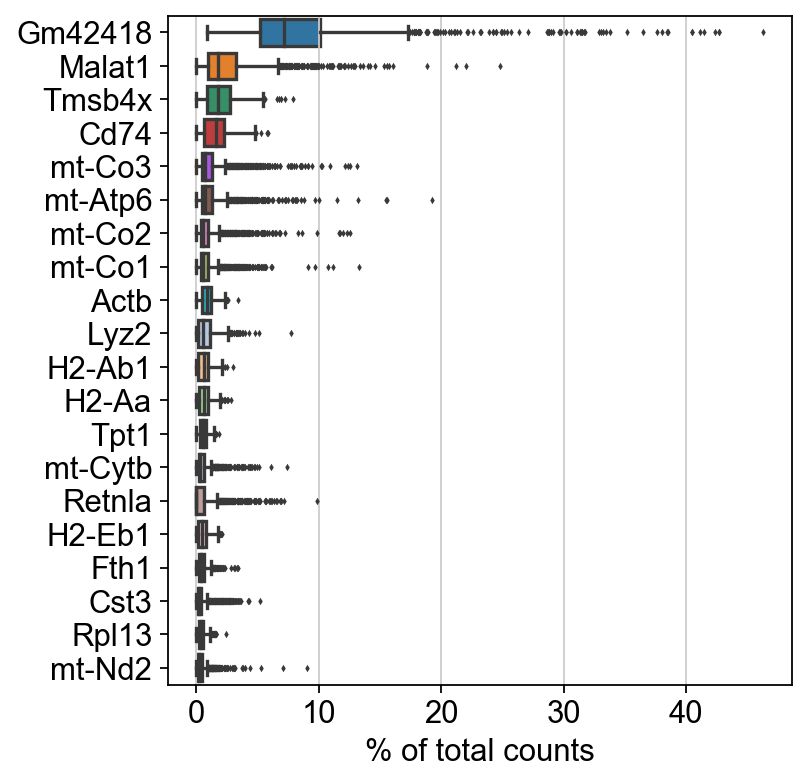

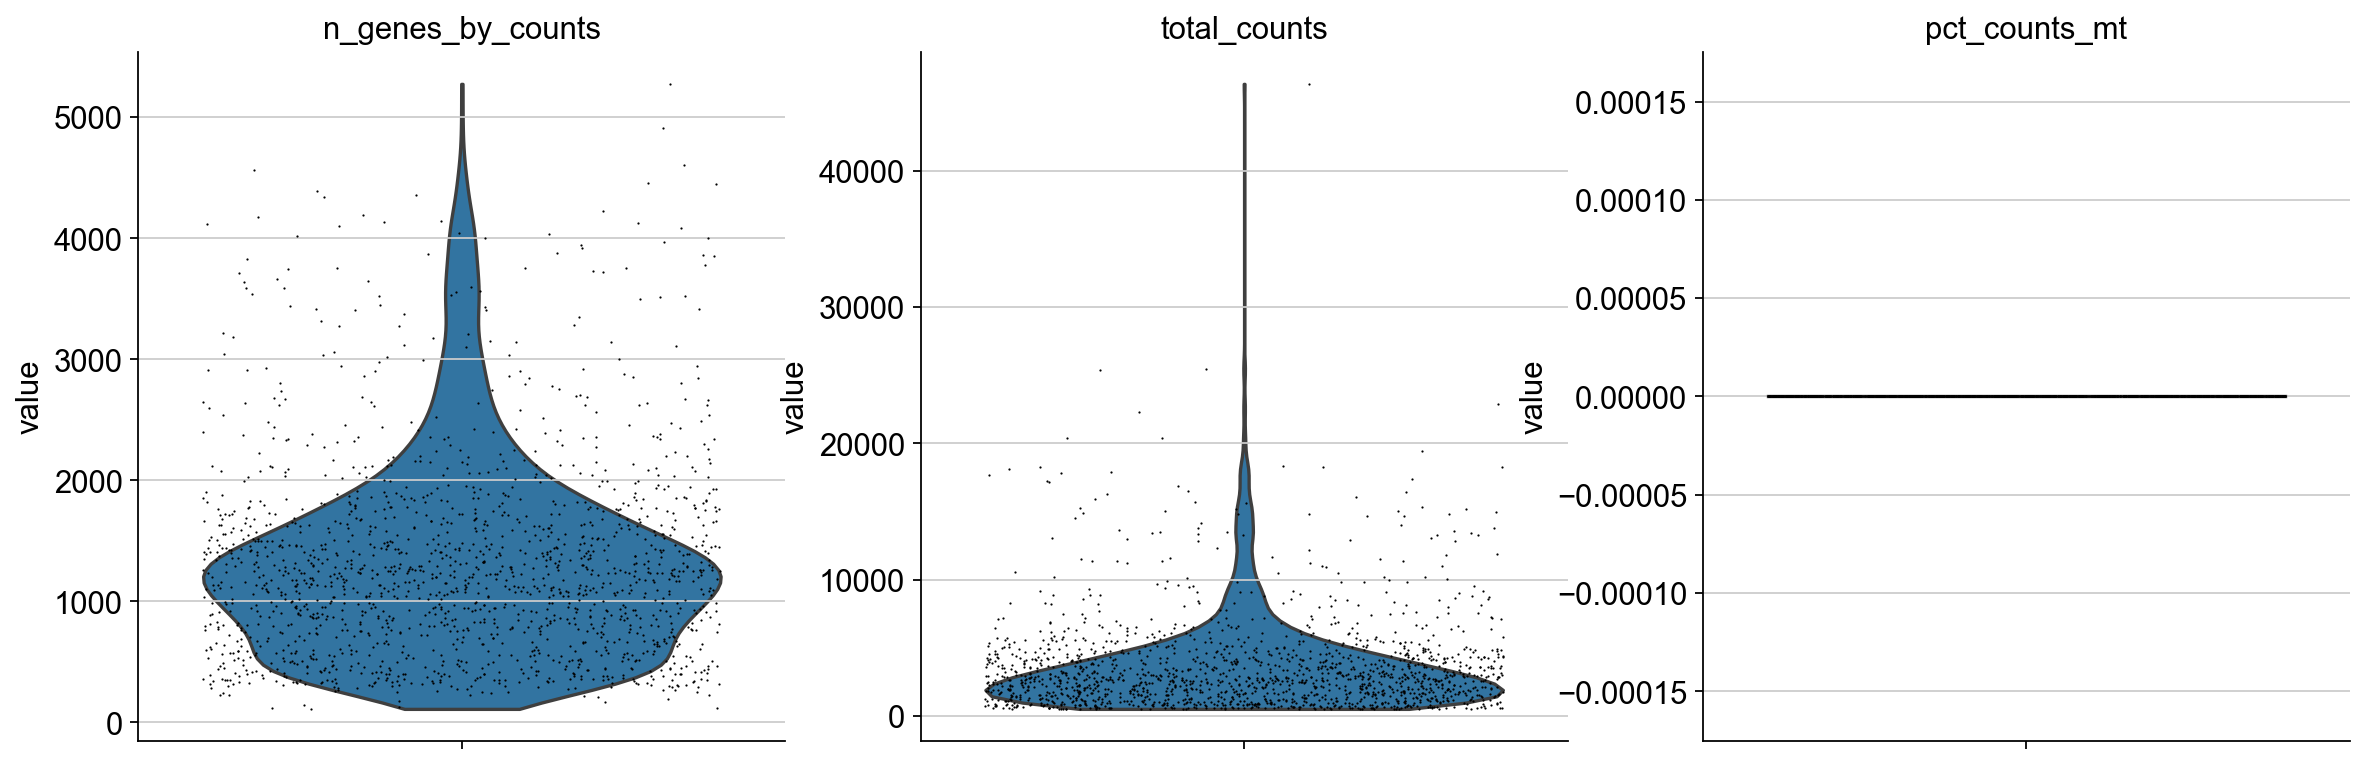

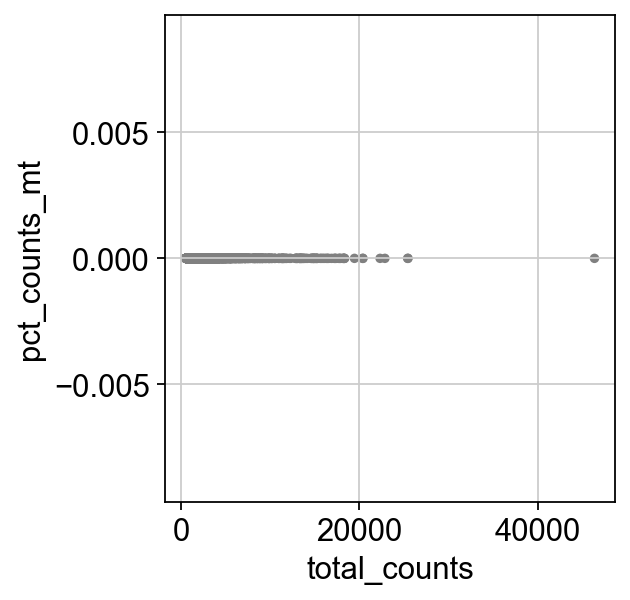

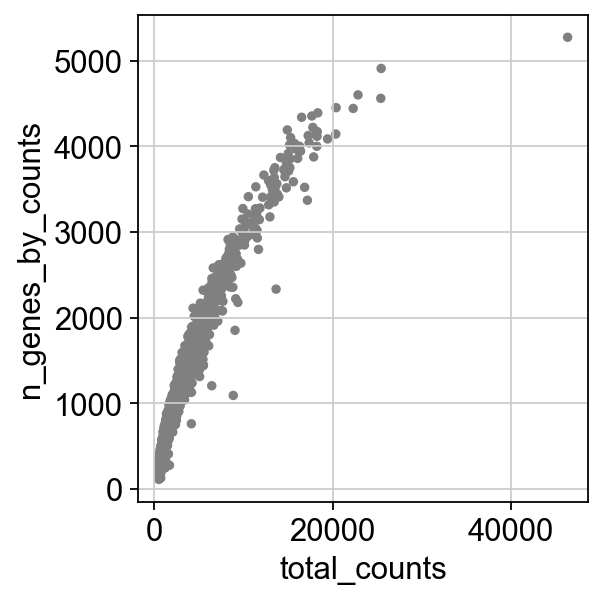

normalizing counts per cell
    finished (0:00:00)
1649
                    Mrpl15  Lypla1     Tcea1  Atp6v1h    Rb1cc1  \
AAACCCAAGACAGCTG-1     0.0     0.0  0.000000      0.0  0.000000   
AAACCCACAAAGACGC-1     0.0     0.0  0.000000      0.0  1.921457   
AAACGAAAGCACTCGC-1     0.0     0.0  0.000000      0.0  0.000000   
AAACGAACAAATGGTA-1     0.0     0.0  0.000000      0.0  0.000000   
AAAGGATGTGTGTTTG-1     0.0     0.0  0.000000      0.0  2.565319   
...                    ...     ...       ...      ...       ...   
TTTGGTTCAGTGGCTC-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGGTTGTAACGTTC-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGGTTTCAGCGTCG-1     0.0     0.0  1.767994      0.0  0.000000   
TTTGTTGGTACGTTCA-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGTTGGTCCACTCT-1     0.0     0.0  1.086885      0.0  0.000000   

                    4732440D04Rik    Pcmtd1  Gm26901      Rrs1  2610203C22Rik  \
AAACCCAAGACAGCTG-1            0.0  0.744418      0.0  0.00

AAACCCAAGACAGCTG-1    1.0
AAACCCACAAAGACGC-1    1.0
AAACGAAAGCACTCGC-1    1.0
AAACGAACAAATGGTA-1    1.0
AAAGGATGTGTGTTTG-1    1.0
                     ... 
TTTGGTTCAGTGGCTC-1    0.0
TTTGGTTGTAACGTTC-1    0.0
TTTGGTTTCAGCGTCG-1    1.0
TTTGTTGGTACGTTCA-1    1.0
TTTGTTGGTCCACTCT-1    1.0
Name: gender, Length: 1649, dtype: float64

In [18]:
realmat = sc.read_mtx('matrix.mtx')
realfeature=pd.read_csv('features.tsv',sep='\t',header=None)
realmat=realmat[0:32285]
realtag=pd.read_csv('tag.csv')
actt=realfeature.loc[realfeature[2] == 'Gene Expression']
celltag=pd.read_csv('barcodes.tsv',sep='\t',header=None)
adata = anndata.AnnData(X=realmat.X.T)
lol = list(celltag[0])  # or pd.Series(actt[1])
adata.obs['cell'] = lol


lmao = list(actt[1])  # or pd.Series(actt[1])
adata.var['gene_ids'] = lmao
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
adata
adata.var['mt'] =  adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.var
# Remove headers and set the index to 'gene_ids'
adata.var.index = adata.var['gene_ids'].values
adata.var.index.name = None  # This removes the header (name) of the index
adata.obs

#adata.var.index = actt[1].astype('string')
sc.pl.highest_expr_genes(adata, n_top=20, )
adata.var_names_make_unique()  # this is unnecessary if us
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
METT=adata.X
dense_matrix = METT.toarray()

#METT = METT[~METT['cell'].isin(realtag['cell_barcode'])
# Convert the dense NumPy array to a Pandas DataFrame
METT = pd.DataFrame(dense_matrix,columns=adata.var_names, index=adata.obs['cell'].values)
METT['cell']=adata.obs['cell'].values
realtag.index=realtag['cell_barcode'].values
result = METT.join(realtag[['feature_call']], how='left')
print(METT.index.isin(realtag.index).sum())
result
# Remove rows where 'gender' is NaN
result = result.dropna(subset=['feature_call'])

print(result)
# Initialize the 'gender' column with NaN or some default value
result['gender'] = None

# Update 'gender' based on 'feature_call'
result.loc[result['feature_call'] == 'CMO305', 'gender'] = 1
result.loc[result['feature_call'] == 'CMO306', 'gender'] = 0
print(result)


columns_to_extract = ['Rpl35', 'Rps27rt', 'Rpl9-ps6', 'Rps27', 'Uba52', 'Lars2', 'Gm42418', 'Uty', 'Kdm5d', 'Eif2s3y', 'Ddx3y', 'Xist']

ffrc=rc.loc[:,columns_to_extract]
ffrc["y"] = pd.Categorical(joined_list)
reboot_training_data = ffrc.sample(frac=0.6, random_state=25)
reboot_testing_data = ffrc.drop(reboot_training_data.index)

rbY_train=reboot_training_data["y"]
rbX_train=reboot_training_data.drop(["y"],axis=1)
rbY_test=reboot_testing_data["y"]
rbX_test=reboot_testing_data.drop(["y"],axis=1)

extracted_df = result[columns_to_extract]
print(extracted_df)
extracted_df['gender']=result['gender']
realtest=extracted_df.drop('gender',axis=1)
realtest_y=result['gender']
realtest_y = realtest_y.astype('float') 
realtest_y

In [19]:
realtest

Rpl35   Rps27rt  Rpl9-ps6     Rps27     Uba52  \
AAACCCAAGACAGCTG-1  1.690256  0.000000       0.0  2.489244  0.744418   
AAACCCACAAAGACGC-1  0.000000  0.000000       0.0  2.538590  2.538590   
AAACGAAAGCACTCGC-1  0.000000  0.000000       0.0  0.000000  0.000000   
AAACGAACAAATGGTA-1  0.000000  2.264689       0.0  0.000000  2.264689   
AAAGGATGTGTGTTTG-1  0.000000  0.000000       0.0  0.000000  0.000000   
...                      ...       ...       ...       ...       ...   
TTTGGTTCAGTGGCTC-1  2.471493  0.000000       0.0  0.000000  1.859427   
TTTGGTTGTAACGTTC-1  0.000000  0.000000       0.0  2.131073  0.000000   
TTTGGTTTCAGCGTCG-1  2.745812  0.000000       0.0  2.745812  1.767994   
TTTGTTGGTACGTTCA-1  3.080791  0.000000       0.0  3.573077  2.070049   
TTTGTTGGTCCACTCT-1  2.181557  0.000000       0.0  2.181557  1.595348   

                       Lars2   Gm42418  Uty  Kdm5d   Eif2s3y     Ddx3y  \
AAACCCAAGACAGCTG-1  2.167511  5.790079  0.0    0.0  0.000000  0.000000   
AAACCCACAAAGACGC-1  3.191448  6.888156  0.0    0.0  0.000000  0.000000   
AAACGAAAGCACTCGC-1  0.000000  5.788145  0.0    0.0  0.000000  0.000000   
AAACGAACAAATGGTA-1  2.904508  5.986185  0.0    0.0  0.000000  0.000000   
AAAGGATGTGTGTTTG-1  3.219260  8.123958  0.0    0.0  0.000000  0.000000   
...                      ...       ...  ...    ...       ...       ...   
TTTGGTTCAGTGGCTC-1  2.471493  7.200241  0.0    0.0  0.000000  0.000000   
TTTGGTTGTAACGTTC-1  0.000000  6.050117  0.0    0.0  0.000000  0.000000   
TTTGGTTTCAGCGTCG-1  0.000000  6.049121  0.0    0.0  0.000000  0.000000   
TTTGTTGGTACGTTCA-1  3.356926  7.608987  0.0    0.0  0.000000  0.000000   
TTTGTTGGTCCACTCT-1  3.118624  7.211483  0.0    0.0  1.086885  1.086885   

                        Xist  
AAACCCAAGACAGCTG-1  0.000000  
AAACCCACAAAGACGC-1  0.000000  
AAACGAAAGCACTCGC-1  0.000000  
AAACGAACAAATGGTA-1  0.000000  
AAAGGATGTGTGTTTG-1  0.000000  
...                      ...  
TTTGGTTCAGTGGCTC-1  3.335779  
TTTGGTTGTAACGTTC-1  3.969675  
TTTGGTTTCAGCGTCG-1  0.000000  
TTTGTTGGTACGTTCA-1  0.000000  
TTTGTTGGTCCACTCT-1  0.000000  

[1649 rows x 12 columns]

In [20]:
realtest_y

AAACCCAAGACAGCTG-1    1.0
AAACCCACAAAGACGC-1    1.0
AAACGAAAGCACTCGC-1    1.0
AAACGAACAAATGGTA-1    1.0
AAAGGATGTGTGTTTG-1    1.0
                     ... 
TTTGGTTCAGTGGCTC-1    0.0
TTTGGTTGTAACGTTC-1    0.0
TTTGGTTTCAGCGTCG-1    1.0
TTTGTTGGTACGTTCA-1    1.0
TTTGTTGGTCCACTCT-1    1.0
Name: gender, Length: 1649, dtype: float64

In [24]:
full_train = rc.sample(frac=1, random_state=25) 
full_Y_train=full_train["y"]
full_X_train=full_train.drop(["y"],axis=1) 
full_X_train = full_X_train[columns_to_extract]

Best F1 Score: 0.9663150731541341
Best AUROC for highest F1: 0.8362153323610927
Best Parameters: {'lr': 0.01, 'batch_size': 64, 'hidden_arch': (50, 100)}


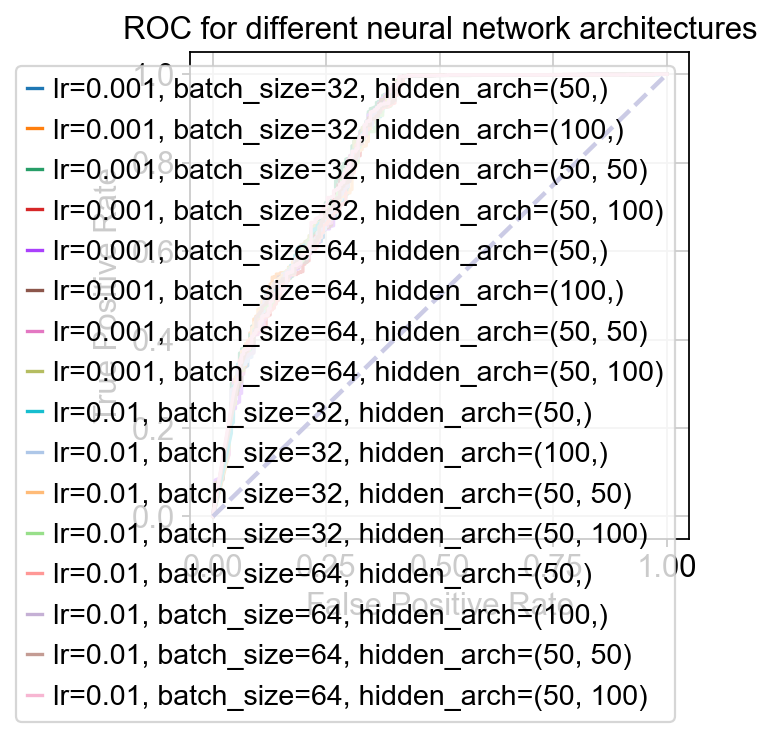

Best AUPRC: 0.9580681665144256


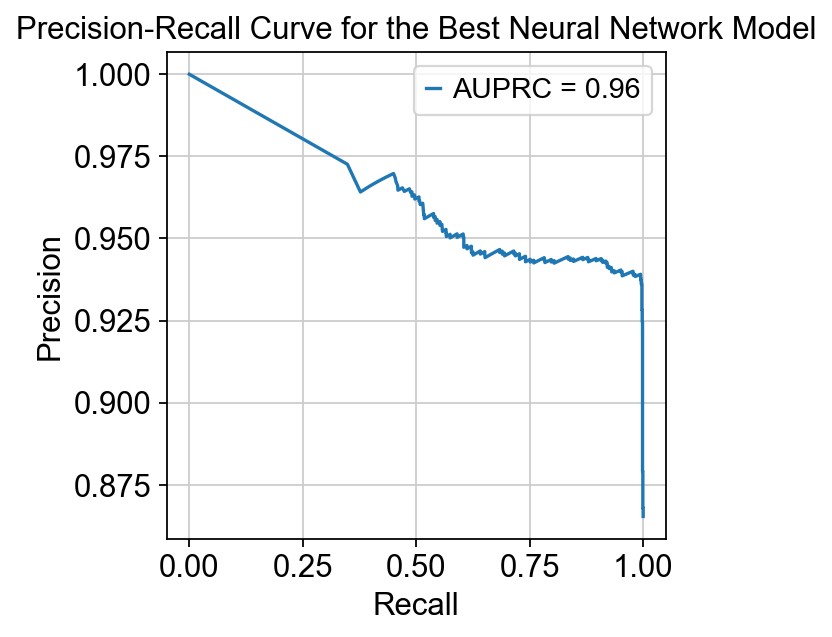

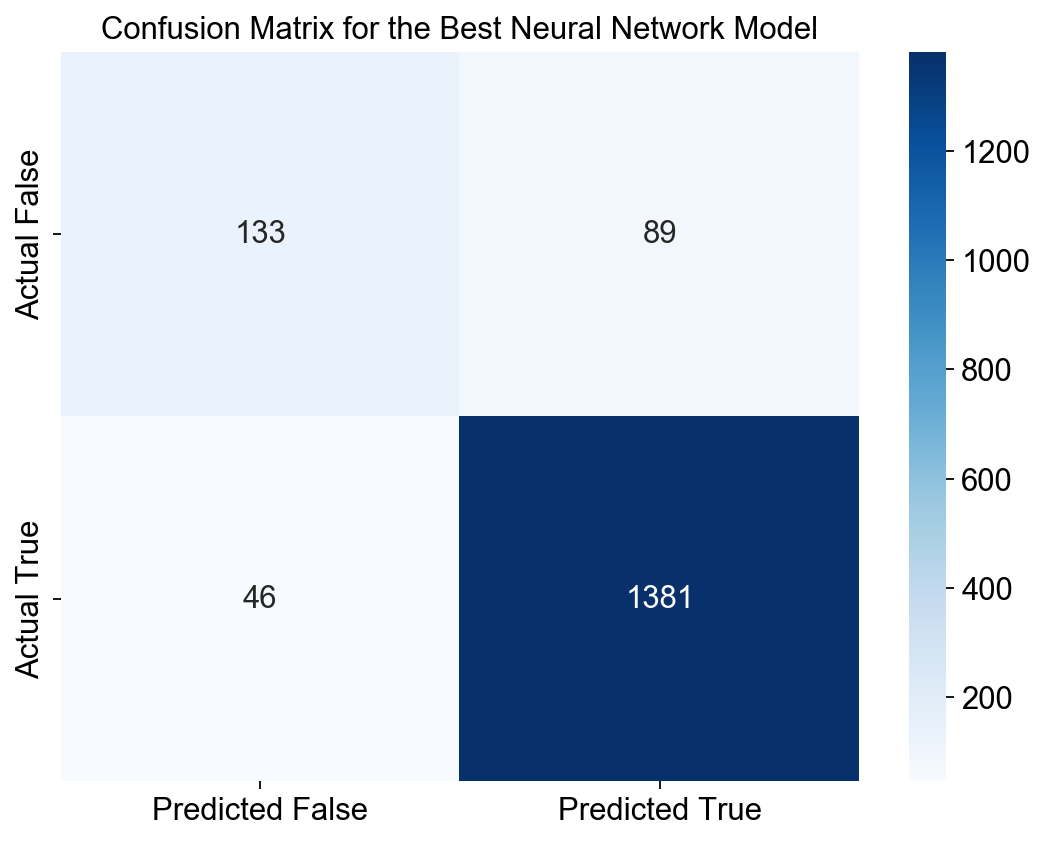

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve

# Assuming rbX_train, rbY_train, realtest, and realtest_y are already loaded

# Hyperparameter Grid
lr_grid = [0.001, 0.01]
batch_size_grid = [32, 64]
hidden_size_grid = [50, 100]
best_auroc = 0
best_f1 = 0
best_params = {}

# Create dictionaries for performance metrics
perf = {}

hidden_archs = [(50,), (100,), (50, 50), (50, 100)]

for lr in lr_grid:
    for batch_size in batch_size_grid:
        for hidden_arch in hidden_archs:
            
            # Define the neural network model
            class SimpleNet(nn.Module):
                def __init__(self, hidden_arch):
                    super(SimpleNet, self).__init__()

                    layers = []
                    input_dim = 12
                    for hidden_dim in hidden_arch:
                        layers.append(nn.Linear(input_dim, hidden_dim))
                        layers.append(nn.ReLU())
                        input_dim = hidden_dim
                    layers.append(nn.Linear(input_dim, 1))
                    self.net = nn.Sequential(*layers)

                def forward(self, x):
                    x = self.net(x)
                    return torch.sigmoid(x).squeeze()

            net = SimpleNet(hidden_arch=hidden_arch)
            
         
            # DataLoader
            train_data = TensorDataset(torch.FloatTensor(full_X_train.values), torch.FloatTensor(full_Y_train.values))
            train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

            # Loss and optimizer
            criterion = nn.BCELoss()
            optimizer = optim.Adam(net.parameters(), lr=lr)
            
            # Training the network (assuming 10 epochs)
            for epoch in range(10):
                for inputs, labels in train_loader:
                    optimizer.zero_grad()
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

            # Test the network
            with torch.no_grad():
                test_inputs = torch.FloatTensor(realtest.values)
                y_test_prob = net(test_inputs).numpy()
                y_test_pred = (y_test_prob > 0.5).astype(int)

            # Calculate AUROC
            fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
            auroc = roc_auc_score(realtest_y, y_test_prob)
            f1 = f1_score(realtest_y, y_test_pred)
            
            param_str = f"lr={lr}, batch_size={batch_size}, hidden_arch={hidden_arch}"
            perf[param_str] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc, 'f1': f1}
            
            if f1 > best_f1:
                best_f1 = f1
                best_auroc = auroc
                best_params = {'lr': lr, 'batch_size': batch_size, 'hidden_arch': hidden_arch}

# ... [Rest of your code]

print("Best F1 Score:", best_f1)
print("Best AUROC for highest F1:", best_auroc)
print("Best Parameters:", best_params)

# ROC curve plot
plt.figure()
for param_str, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=param_str)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for different neural network architectures')
plt.legend()
plt.show()

# ... [Your previous code]

import seaborn as sns
from sklearn.metrics import confusion_matrix

 


# Calculate the confusion matrix for the best model
best_model = SimpleNet(hidden_arch=best_params['hidden_arch'])  # <-- This line is modified.

# Load the best model parameters
# Note: You would typically use `torch.load()` to load saved model parameters.
# For simplicity, here we are retraining the model with the best hyperparameters.
optimizer = optim.Adam(best_model.parameters(), lr=best_params['lr'])
train_data = TensorDataset(torch.FloatTensor(full_X_train.values), torch.FloatTensor(full_Y_train.values))
train_loader = DataLoader(dataset=train_data, batch_size=best_params['batch_size'], shuffle=True)
for epoch in range(10):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = best_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

with torch.no_grad():
    test_inputs = torch.FloatTensor(realtest.values)
    y_test_prob_best = best_model(test_inputs).numpy()
    y_test_pred_best = (y_test_prob_best > 0.5).astype(int)



# Compute AUPRC for the best model
auprc = average_precision_score(realtest_y, y_test_prob_best)

print("Best AUPRC:", auprc)

# Plot the precision-recall curve for the best model
precision, recall, _ = precision_recall_curve(realtest_y, y_test_prob_best)

plt.figure()
plt.plot(recall, precision, label=f"AUPRC = {auprc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for the Best Neural Network Model")
plt.legend()
plt.show()





cm = confusion_matrix(realtest_y, y_test_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted False", "Predicted True"], yticklabels=["Actual False", "Actual True"])
plt.title("Confusion Matrix for the Best Neural Network Model")
plt.show()



Best F1 Score: 0.9638718473074301
Best AUROC for highest F1: 0.8307969847913786
Best Parameters: {'lr': 0.01, 'batch_size': 32, 'hidden_size': 50}


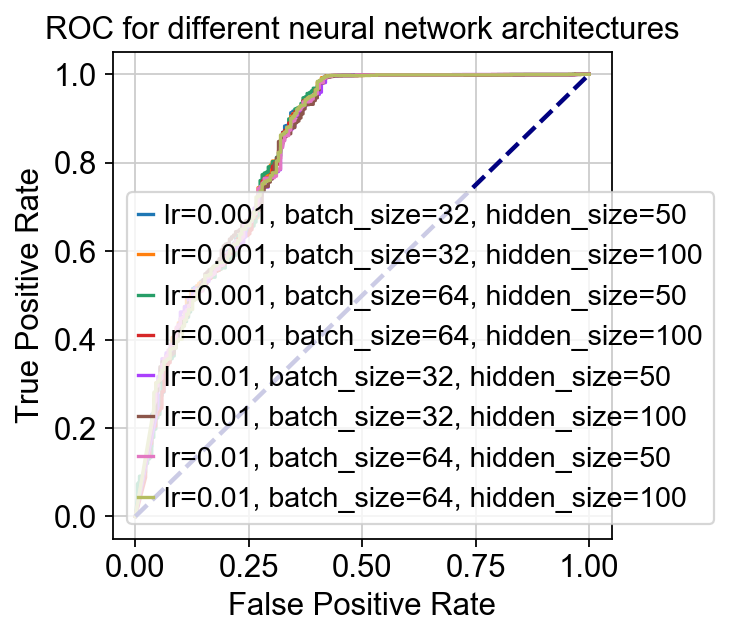

Best AUPRC: 0.9581216128740329


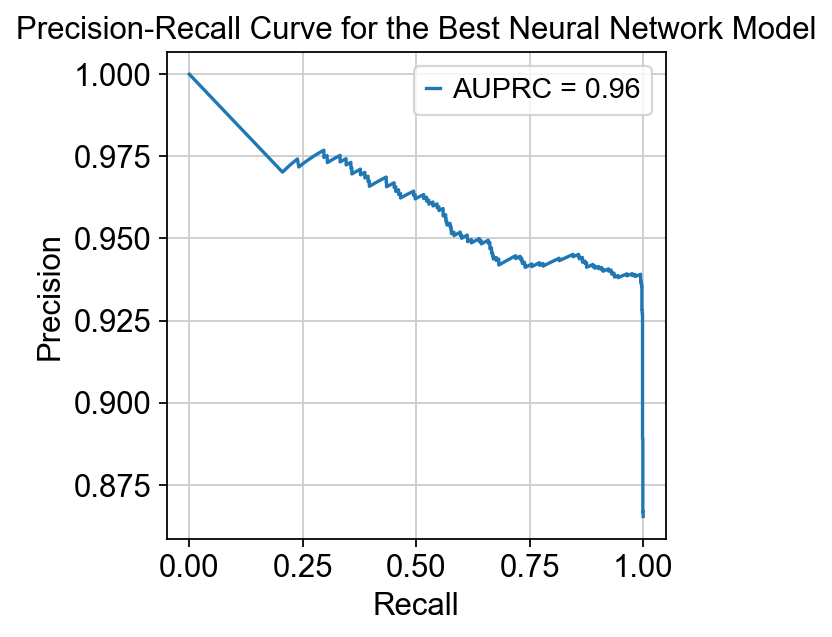

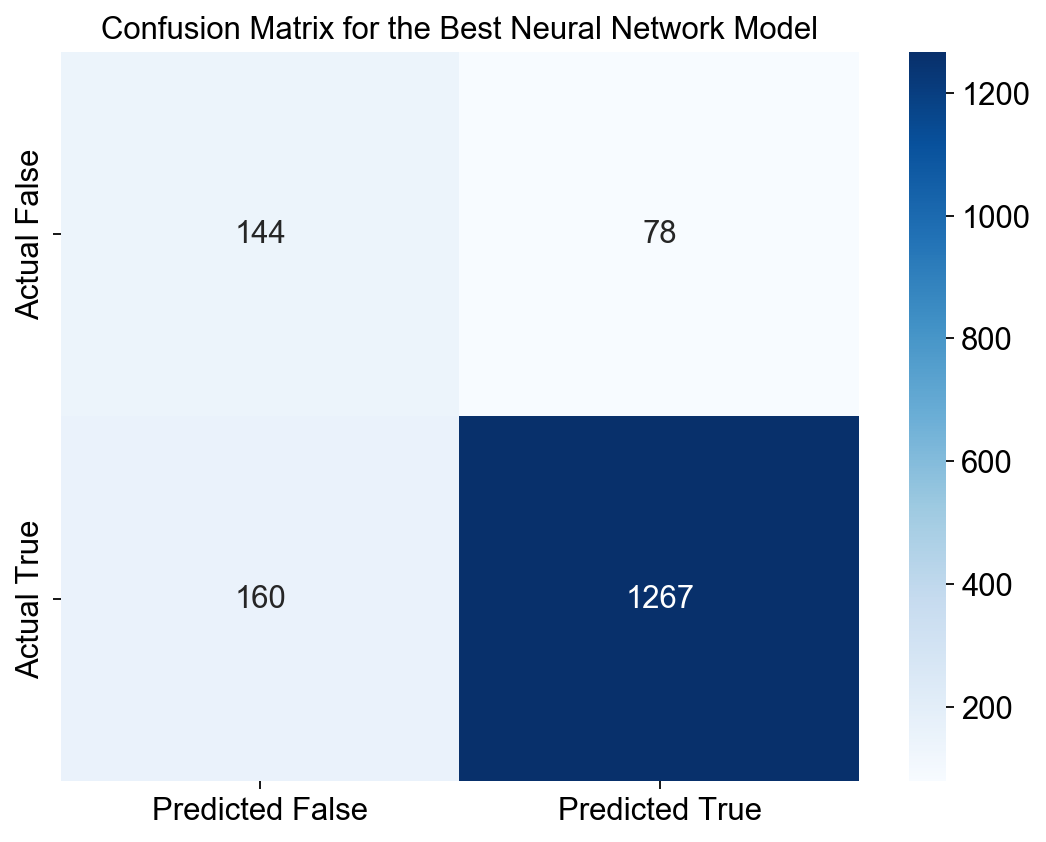

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve

# Assuming rbX_train, rbY_train, realtest, and realtest_y are already loaded

# Hyperparameter Grid
lr_grid = [0.001, 0.01]
batch_size_grid = [32, 64]
hidden_size_grid = [50, 100]
best_auroc = 0
best_f1 = 0
best_params = {}

# Create dictionaries for performance metrics
perf = {}

for lr in lr_grid:
    for batch_size in batch_size_grid:
        for hidden_size in hidden_size_grid:
            
            # Define the neural network model
            class SimpleNet(nn.Module):
                def __init__(self):
                    super(SimpleNet, self).__init__()
                    self.fc1 = nn.Linear(12, hidden_size)
                    self.fc2 = nn.Linear(hidden_size, 1)

                def forward(self, x):
                    x = torch.relu(self.fc1(x))
                    x = torch.sigmoid(self.fc2(x))
                    return x.squeeze()

            net = SimpleNet()
            
            # DataLoader
            train_data = TensorDataset(torch.FloatTensor(full_X_train.values), torch.FloatTensor(full_Y_train.values))
            train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

            # Loss and optimizer
            criterion = nn.BCELoss()
            optimizer = optim.Adam(net.parameters(), lr=lr)
            
            # Training the network (assuming 10 epochs)
            for epoch in range(10):
                for inputs, labels in train_loader:
                    optimizer.zero_grad()
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

            # Test the network
            with torch.no_grad():
                test_inputs = torch.FloatTensor(realtest.values)
                y_test_prob = net(test_inputs).numpy()
                y_test_pred = (y_test_prob > 0.5).astype(int)

            # Calculate AUROC
            fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
            auroc = roc_auc_score(realtest_y, y_test_prob)
            f1 = f1_score(realtest_y, y_test_pred)
            
            param_str = f"lr={lr}, batch_size={batch_size}, hidden_size={hidden_size}"
            perf[param_str] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc, 'f1': f1}
            
            if f1 > best_f1:
                best_f1 = f1
                best_auroc = auroc
                best_params = {'lr': lr, 'batch_size': batch_size, 'hidden_size': hidden_size}

print("Best F1 Score:", best_f1)
print("Best AUROC for highest F1:", best_auroc)
print("Best Parameters:", best_params)

# ROC curve plot
plt.figure()
for param_str, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=param_str)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for different neural network architectures')
plt.legend()
plt.show()

# ... [Your previous code]

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the best model
best_model = SimpleNet()

# Load the best model parameters
# Note: You would typically use `torch.load()` to load saved model parameters.
# For simplicity, here we are retraining the model with the best hyperparameters.
optimizer = optim.Adam(best_model.parameters(), lr=best_params['lr'])
train_data = TensorDataset(torch.FloatTensor(full_X_train.values), torch.FloatTensor(full_Y_train.values))
train_loader = DataLoader(dataset=train_data, batch_size=best_params['batch_size'], shuffle=True)
for epoch in range(10):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = best_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

with torch.no_grad():
    test_inputs = torch.FloatTensor(realtest.values)
    y_test_prob_best = best_model(test_inputs).numpy()
    y_test_pred_best = (y_test_prob_best > 0.5).astype(int)



# Compute AUPRC for the best model
auprc = average_precision_score(realtest_y, y_test_prob_best)

print("Best AUPRC:", auprc)

# Plot the precision-recall curve for the best model
precision, recall, _ = precision_recall_curve(realtest_y, y_test_prob_best)

plt.figure()
plt.plot(recall, precision, label=f"AUPRC = {auprc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for the Best Neural Network Model")
plt.legend()
plt.show()





cm = confusion_matrix(realtest_y, y_test_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted False", "Predicted True"], yticklabels=["Actual False", "Actual True"])
plt.title("Confusion Matrix for the Best Neural Network Model")
plt.show()






F1 Score: 0.9411352487736511


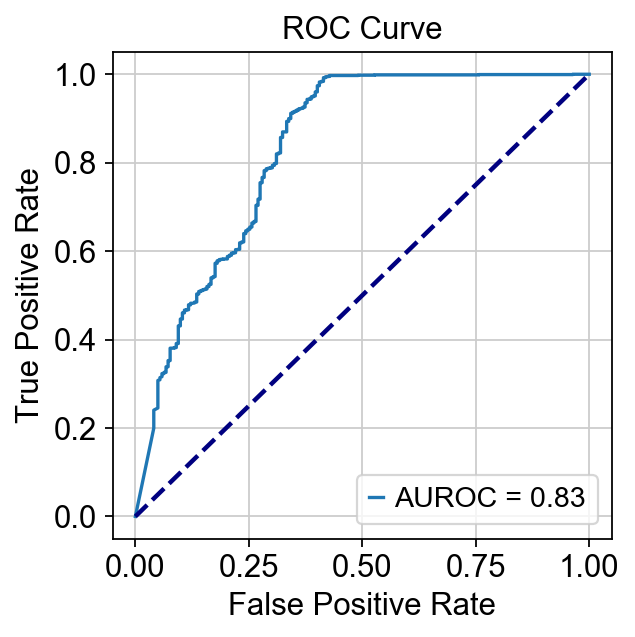

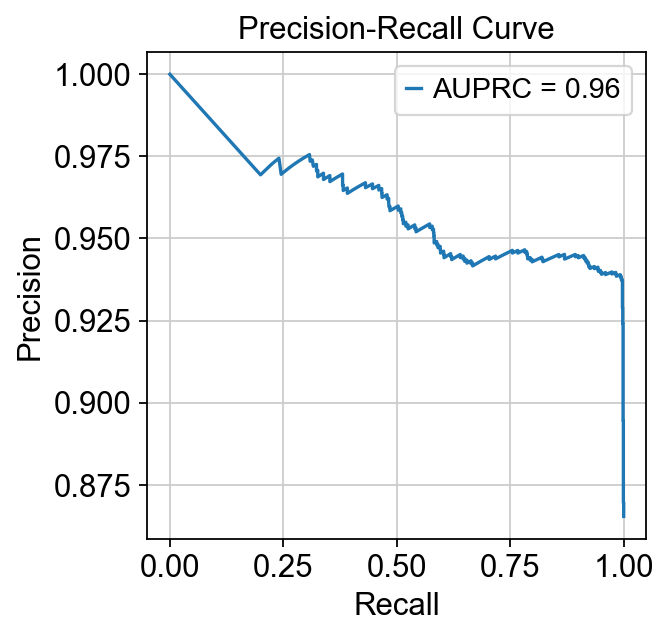

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming rbX_train, rbY_train, realtest, and realtest_y are already loaded

# Define the neural network model
class SimpleNet(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(12, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.squeeze()

# Initialize the model
model = SimpleNet(hidden_size=50)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()
train_data = TensorDataset(torch.FloatTensor(rbX_train.values), torch.FloatTensor(rbY_train.values))
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)

# Train the model
for epoch in range(10):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Test the model
with torch.no_grad():
    test_inputs = torch.FloatTensor(realtest.values)
    y_test_prob = model(test_inputs).numpy()
    y_test_pred = (y_test_prob > 0.5).astype(int)

# Calculate metrics
f1 = f1_score(realtest_y, y_test_pred)
fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
auroc = roc_auc_score(realtest_y, y_test_prob)
precision, recall, _ = precision_recall_curve(realtest_y, y_test_prob)
auprc = average_precision_score(realtest_y, y_test_prob)

# Plotting

# 1. F1 Score
print("F1 Score:", f1)

# 2. ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"AUROC = {auroc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 3. Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label=f"AUPRC = {auprc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [31]:
realtest

Rpl35   Rps27rt  Rpl9-ps6     Rps27     Uba52  \
AAACCCAAGACAGCTG-1  1.690256  0.000000       0.0  2.489244  0.744418   
AAACCCACAAAGACGC-1  0.000000  0.000000       0.0  2.538590  2.538590   
AAACGAAAGCACTCGC-1  0.000000  0.000000       0.0  0.000000  0.000000   
AAACGAACAAATGGTA-1  0.000000  2.264689       0.0  0.000000  2.264689   
AAAGGATGTGTGTTTG-1  0.000000  0.000000       0.0  0.000000  0.000000   
...                      ...       ...       ...       ...       ...   
TTTGGTTCAGTGGCTC-1  2.471493  0.000000       0.0  0.000000  1.859427   
TTTGGTTGTAACGTTC-1  0.000000  0.000000       0.0  2.131073  0.000000   
TTTGGTTTCAGCGTCG-1  2.745812  0.000000       0.0  2.745812  1.767994   
TTTGTTGGTACGTTCA-1  3.080791  0.000000       0.0  3.573077  2.070049   
TTTGTTGGTCCACTCT-1  2.181557  0.000000       0.0  2.181557  1.595348   

                       Lars2   Gm42418  Uty  Kdm5d   Eif2s3y     Ddx3y  \
AAACCCAAGACAGCTG-1  2.167511  5.790079  0.0    0.0  0.000000  0.000000   
AAACCCACAAAGACGC-1  3.191448  6.888156  0.0    0.0  0.000000  0.000000   
AAACGAAAGCACTCGC-1  0.000000  5.788145  0.0    0.0  0.000000  0.000000   
AAACGAACAAATGGTA-1  2.904508  5.986185  0.0    0.0  0.000000  0.000000   
AAAGGATGTGTGTTTG-1  3.219260  8.123958  0.0    0.0  0.000000  0.000000   
...                      ...       ...  ...    ...       ...       ...   
TTTGGTTCAGTGGCTC-1  2.471493  7.200241  0.0    0.0  0.000000  0.000000   
TTTGGTTGTAACGTTC-1  0.000000  6.050117  0.0    0.0  0.000000  0.000000   
TTTGGTTTCAGCGTCG-1  0.000000  6.049121  0.0    0.0  0.000000  0.000000   
TTTGTTGGTACGTTCA-1  3.356926  7.608987  0.0    0.0  0.000000  0.000000   
TTTGTTGGTCCACTCT-1  3.118624  7.211483  0.0    0.0  1.086885  1.086885   

                        Xist  
AAACCCAAGACAGCTG-1  0.000000  
AAACCCACAAAGACGC-1  0.000000  
AAACGAAAGCACTCGC-1  0.000000  
AAACGAACAAATGGTA-1  0.000000  
AAAGGATGTGTGTTTG-1  0.000000  
...                      ...  
TTTGGTTCAGTGGCTC-1  3.335779  
TTTGGTTGTAACGTTC-1  3.969675  
TTTGGTTTCAGCGTCG-1  0.000000  
TTTGTTGGTACGTTCA-1  0.000000  
TTTGTTGGTCCACTCT-1  0.000000  

[1649 rows x 12 columns]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming rbX_train, rbY_train, realtest, and realtest_y are already loaded
# rbX_train, rbY_train, realtest, realtest_y = ...

# Hyperparameter Grid
lr_grid = [0.001, 0.01]
batch_size_grid = [32, 64]
hidden_size_grid = [50, 100]
best_auroc = 0
best_params = {}

# Create dictionaries for performance metrics
perf = {}

for lr in lr_grid:
    for batch_size in batch_size_grid:
        for hidden_size in hidden_size_grid:
            
            # Define the neural network model
            class SimpleNet(nn.Module):
                def __init__(self):
                    super(SimpleNet, self).__init__()
                    self.fc1 = nn.Linear(12, hidden_size)
                    self.fc2 = nn.Linear(hidden_size, 1)

                def forward(self, x):
                    x = torch.relu(self.fc1(x))
                    x = torch.sigmoid(self.fc2(x))
                    return x.squeeze()

            net = SimpleNet()
            
            # DataLoader
            train_data = TensorDataset(torch.FloatTensor(full_X_train.values), torch.FloatTensor(full_Y_train.values))
            train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

            # Loss and optimizer
            criterion = nn.BCELoss()
            optimizer = optim.Adam(net.parameters(), lr=lr)
            
            # Training the network (assuming 10 epochs)
            for epoch in range(10):
                for inputs, labels in train_loader:
                    optimizer.zero_grad()
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

            # Test the network
            with torch.no_grad():
                test_inputs = torch.FloatTensor(realtest.values)
                y_test_prob = net(test_inputs).numpy()

            # Calculate AUROC
            fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
            auroc = roc_auc_score(realtest_y, y_test_prob)
            
            param_str = f"lr={lr}, batch_size={batch_size}, hidden_size={hidden_size}"
            perf[param_str] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
            
            if auroc > best_auroc:
                best_auroc = auroc
                best_params = {'lr': lr, 'batch_size': batch_size, 'hidden_size': hidden_size}

print("Best AUROC:", best_auroc)
print("Best Parameters:", best_params)

# ROC curve plot
plt.figure()
for param_str, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=param_str)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for different neural network architectures')
plt.legend()
plt.show()


In [1493]:
col_select=['Rpl35','Rps27rt', 'Rpl9-ps6','Rps27','Uba52','Lars2','Gm42418','Uty',  'Kdm5d','Eif2s3y', 'Ddx3y','Xist']

In [1494]:
place=[ "Chromosome 2"  ,"Chromosome 9","Chromosome 19 ","Chromosome 3", "Chromosome 8 ",
       " Chromosome 9", "Chromosome 17","Chromosome Y","Chromosome Y","Chromosome Y"," Chromosome Y","Chromosome X" ]

In [1495]:
import pandas as pd
dfff = pd.DataFrame(col_select, columns = ['gene'])
dfff["chromosome"]=place

genes and their chromosome

In [1496]:
dfff

gene      chromosome
0      Rpl35    Chromosome 2
1    Rps27rt    Chromosome 9
2   Rpl9-ps6  Chromosome 19 
3      Rps27    Chromosome 3
4      Uba52   Chromosome 8 
5      Lars2    Chromosome 9
6    Gm42418   Chromosome 17
7        Uty    Chromosome Y
8      Kdm5d    Chromosome Y
9    Eif2s3y    Chromosome Y
10     Ddx3y    Chromosome Y
11      Xist    Chromosome X

the following is the dataset we will use with only 12 features(the 12 gene we selected before)

run random forest model again, we see the accuracy is significantly better, reaching 90%

In [1497]:
ffrc=rc.loc[:, col_select]
ffrc["y"] = pd.Categorical(joined_list)
reboot_training_data = ffrc.sample(frac=0.6, random_state=25)
reboot_testing_data = ffrc.drop(reboot_training_data.index)

rbY_train=reboot_training_data["y"]
rbX_train=reboot_training_data.drop(["y"],axis=1)
rbY_test=reboot_testing_data["y"]
rbX_test=reboot_testing_data.drop(["y"],axis=1)


No handles with labels found to put in legend.


0.3268135100132653

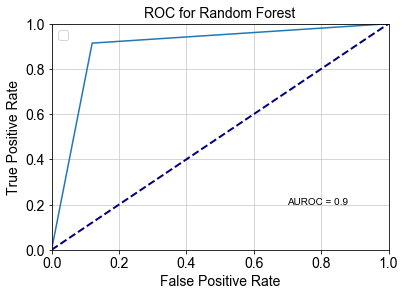

In [1498]:
rbrf = RandomForestClassifier(max_depth=100, random_state=561).fit(rbX_train, rbY_train)
rby_test_prob = rbrf.predict(rbX_test)
fpr, tpr, _ = roc_curve(rbY_test, rby_test_prob)
auroc = roc_auc_score(rbY_test, rby_test_prob)

plt.plot(fpr, tpr)
plt.text(0.7, 0.2, 'AUROC = '+ str(round(auroc, 2)))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for Random Forest')
plt.legend()
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(rbY_test, rby_test_prob)
rmse = np.sqrt(mse)
rmse

the following auroc curve is the accuracy plot we have using previous 4 models, but this time we fit models with only the 12 genes we selected( most important ones)

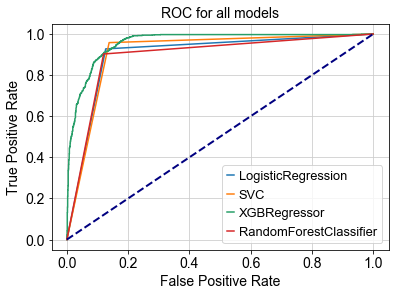

In [1499]:
models = [LogisticRegression(max_iter=1000, random_state=551),SVC(gamma='scale', random_state=551),XGBRegressor(random_state=551),RandomForestClassifier(max_depth=100, random_state=551)]

perf = {}

model_names = []

auroc_val = []
fit=[None]*6
i=0
for model in models:
    fit[i] = model.fit(rbX_train, rbY_train)
    y_test_prob = fit[i].predict(rbX_test)
    fpr, tpr, _ = roc_curve(rbY_test, y_test_prob)
    auroc = roc_auc_score(rbY_test, y_test_prob)
    perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    auroc_val.append(auroc)
    i=i+1


plt.clf()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
    model_names.append(model_name)


plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()

here we can see the classification accuracy of each model trained and tested with data of 12 selected genes is around or above 90%
proves that theses 12 genes are important, we can accurately predict gender with these 12 genes.

[0 1 2 3]
[0.9004209865651404, 0.910083545997667, 0.9584194352503715, 0.8914443806286969]
['LogisticRegression', 'SVC', 'XGBRegressor', 'RandomForestClassifier']


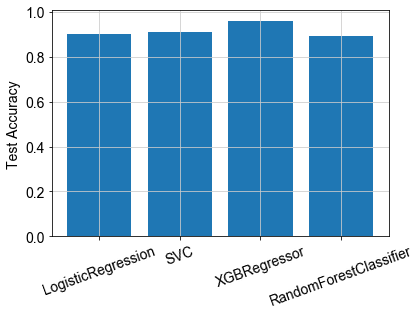

In [1500]:

pos = np.arange(len(model_names))
print(pos)
print(auroc_val)
print(model_names)
plt.bar(pos, auroc_val)
plt.ylabel('Test Accuracy')
plt.xticks(pos, model_names)
plt.xticks(rotation = 20)
plt.show()

In [1501]:
rbY_train

Cell_1678    1.0
Cell_3705    0.0
Cell_5187    0.0
Cell_1921    1.0
Cell_1575    1.0
            ... 
Cell_3039    0.0
Cell_1332    1.0
Cell_690     1.0
Cell_1700    1.0
Cell_299     1.0
Name: y, Length: 3989, dtype: category
Categories (2, float64): [0.0, 1.0]

In [1502]:
rbX_train 

n             Rpl35   Rps27rt  Rpl9-ps6     Rps27     Uba52     Lars2  \
Cell_1678  0.741276  0.526589  0.000000  0.000000  0.741276  0.526589   
Cell_3705  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Cell_5187  1.080418  0.869742  0.741276  0.526589  0.526589  0.000000   
Cell_1921  1.080418  0.526589  0.741276  0.741276  0.741276  0.526589   
Cell_1575  1.291725  1.358505  1.080418  0.741276  1.026672  0.741276   
...             ...       ...       ...       ...       ...       ...   
Cell_3039  1.026672  0.741276  0.000000  0.741276  0.000000  0.000000   
Cell_1332  0.869742  0.526589  0.526589  0.000000  0.000000  1.162283   
Cell_690   0.000000  0.526589  0.526589  0.526589  0.000000  0.526589   
Cell_1700  0.526589  0.000000  0.000000  0.000000  0.000000  0.000000   
Cell_299   1.124748  0.869742  0.869742  0.869742  0.000000  0.000000   

n           Gm42418  Uty  Kdm5d   Eif2s3y     Ddx3y      Xist  
Cell_1678  1.291725  0.0    0.0  0.000000  0.000000  0.000000  
Cell_3705  1.124748  0.0    0.0  0.000000  0.000000  1.026672  
Cell_5187  1.474144  0.0    0.0  0.000000  0.000000  1.223156  
Cell_1921  1.385227  0.0    0.0  0.000000  0.526589  0.000000  
Cell_1575  1.503301  0.0    0.0  0.000000  0.000000  0.000000  
...             ...  ...    ...       ...       ...       ...  
Cell_3039  1.194705  0.0    0.0  0.000000  0.000000  0.869742  
Cell_1332  1.595709  0.0    0.0  0.000000  0.000000  0.000000  
Cell_690   1.516302  0.0    0.0  0.000000  0.526589  0.000000  
Cell_1700  1.343703  0.0    0.0  0.526589  0.000000  0.000000  
Cell_299   1.124748  0.0    0.0  0.000000  0.000000  0.000000  

[3989 rows x 12 columns]

In [1503]:
rbY_test

Cell_3       1.0
Cell_8       1.0
Cell_10      1.0
Cell_11      1.0
Cell_14      1.0
            ... 
Cell_6632    0.0
Cell_6633    0.0
Cell_6634    0.0
Cell_6637    0.0
Cell_6641    0.0
Name: y, Length: 2659, dtype: category
Categories (2, float64): [0.0, 1.0]

['Fkbp5',
 'Rnaset2a',
 'Gm20594',
 'Rpl35',
 'Rps27rt',
 'AY036118',
 'Adh1',
 'Rpl9-ps6',
 'Rpl36a-ps1',
 'Rps27',
 'Uba52',
 'Wdr89',
 'Lars2',
 'Tsix',
 'Gm42418',
 'Uty',
 'Kdm5d',
 'Eif2s3y',
 'Ddx3y',
 'Xist',
 'Fkbp5',
 'Rnaset2a',
 'Gm20594',
 'Rpl35',
 'Rps27rt',
 'AY036118',
 'Adh1',
 'Rpl9-ps6',
 'Rpl36a-ps1',
 'Rps27',
 'Uba52',
 'Wdr89',
 'Lars2',
 'Tsix',
 'Gm42418',
 'Uty',
 'Kdm5d',
 'Eif2s3y',
 'Ddx3y',
 'Xist',
 'Fkbp5',
 'Rnaset2a',
 'Gm20594',
 'Rpl35',
 'Rps27rt',
 'AY036118',
 'Adh1',
 'Rpl9-ps6',
 'Rpl36a-ps1',
 'Rps27',
 'Uba52',
 'Wdr89',
 'Lars2',
 'Tsix',
 'Gm42418',
 'Uty',
 'Kdm5d',
 'Eif2s3y',
 'Ddx3y',
 'Xist',
 'Rpl35a',
 'mt-Co2',
 'Cd74',
 'H2-Eb1',
 'mt-Co3',
 'H2-Ab1',
 'Rpl9-ps6',
 'mt-Cytb',
 'Retnla',
 'Uty',
 'Uba52',
 'Rps27',
 'Kdm5d',
 'Lars2',
 'Rpl35',
 'Rps27rt',
 'Eif2s3y',
 'Gm42418',
 'Ddx3y',
 'Xist']

# data


In [20]:
realmat = sc.read_mtx('matrix.mtx')
realfeature=pd.read_csv('features.tsv',sep='\t',header=None)
realmat=realmat[0:32285]
realtag=pd.read_csv('tag.csv')
actt=realfeature.loc[realfeature[2] == 'Gene Expression']
celltag=pd.read_csv('barcodes.tsv',sep='\t',header=None)
adata = anndata.AnnData(X=realmat.X.T)
lol = list(celltag[0])  # or pd.Series(actt[1])
adata.obs['cell'] = lol


lmao = list(actt[1])  # or pd.Series(actt[1])
adata.var['gene_ids'] = lmao
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
adata
adata.var['mt'] =  adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.var
# Remove headers and set the index to 'gene_ids'
adata.var.index = adata.var['gene_ids'].values
adata.var.index.name = None  # This removes the header (name) of the index
adata.obs

#adata.var.index = actt[1].astype('string')

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.8.1 pandas==1.2.4 scikit-learn==1.1.1 statsmodels==0.14.0rc0 python-igraph==0.10.4 pynndescent==0.5.10
filtered out 3 cells that have less than 100 genes expressed
filtered out 19261 genes that are detected in less than 3 cells


cell  n_genes  n_genes_by_counts  total_counts  \
0     AAACCCAAGACAGCTG-1     1867               1853        9048.0   
1     AAACCCACAAAGACGC-1      923                922        1715.0   
2     AAACGAAAGCACTCGC-1      458                458         799.0   
3     AAACGAACAAATGGTA-1      692                692        1159.0   
4     AAAGGATGTGTGTTTG-1      285                284         833.0   
...                  ...      ...                ...           ...   
1647  TTTGGTTCAGTGGCTC-1      971                969        1845.0   
1648  TTTGGTTGTAACGTTC-1      753                751        1347.0   
1649  TTTGGTTTCAGCGTCG-1      983                983        2058.0   
1650  TTTGTTGGTACGTTCA-1      650                647        1444.0   
1651  TTTGTTGGTCCACTCT-1     1961               1957        5089.0   

      total_counts_mt  pct_counts_mt  
0                 0.0            0.0  
1                 0.0            0.0  
2                 0.0            0.0  
3                 0.0            0.0  
4                 0.0            0.0  
...               ...            ...  
1647              0.0            0.0  
1648              0.0            0.0  
1649              0.0            0.0  
1650              0.0            0.0  
1651              0.0            0.0  

[1649 rows x 6 columns]

normalizing counts per cell
    finished (0:00:00)


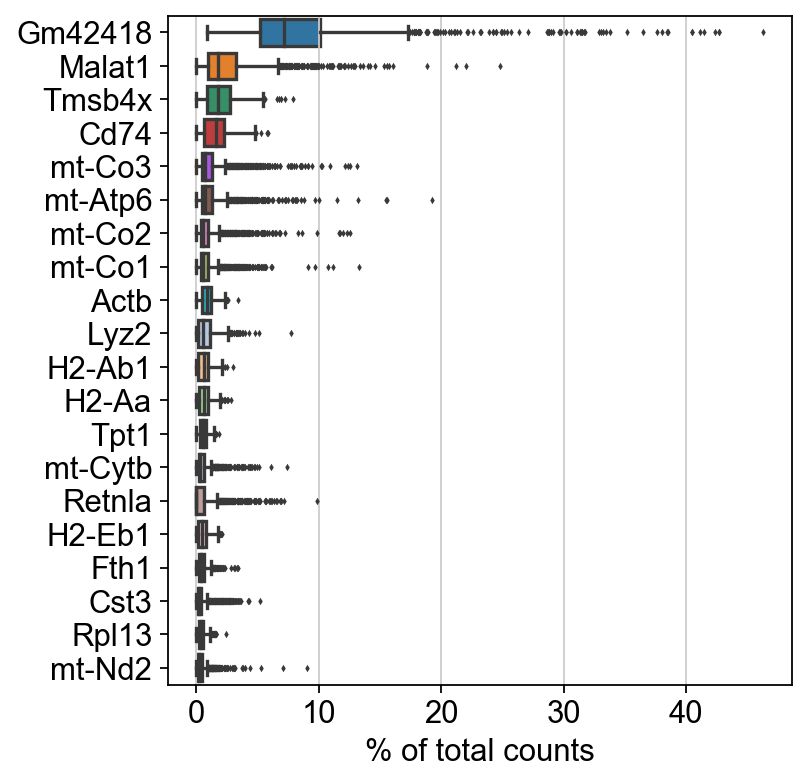

In [21]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [22]:
adata.var_names_make_unique()  # this is unnecessary if us

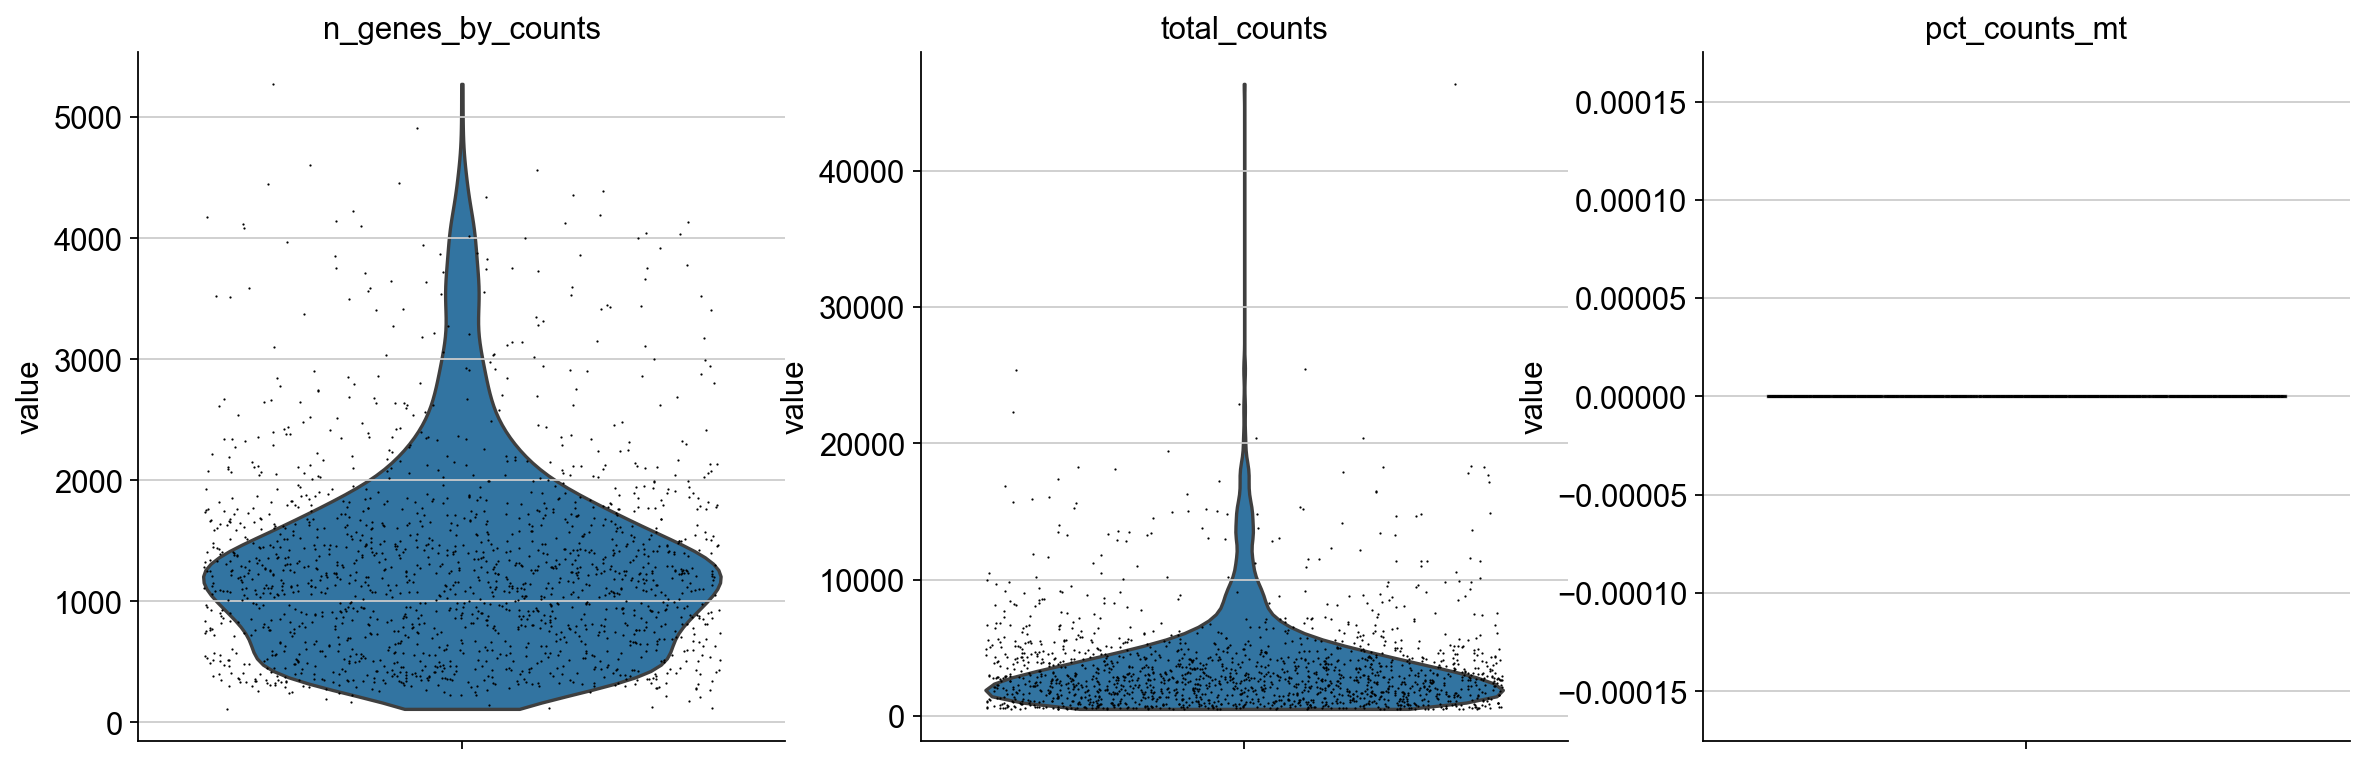

In [23]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

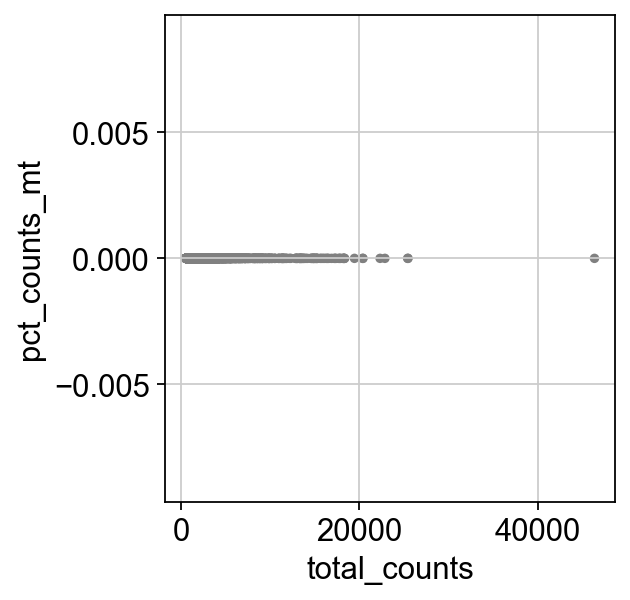

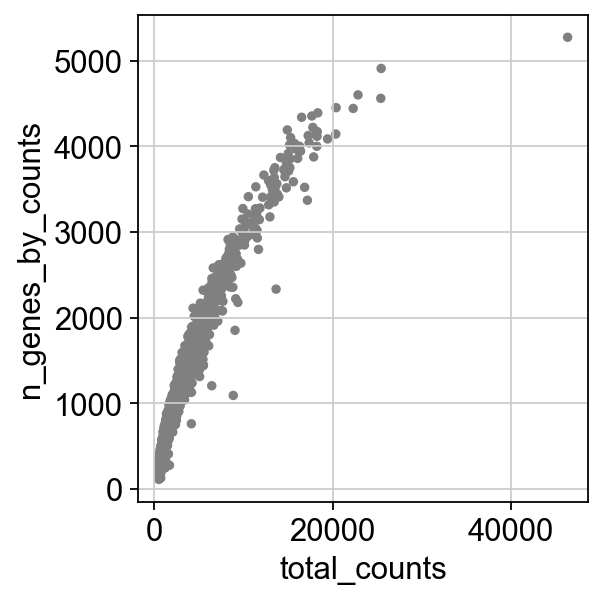

In [24]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [1379]:
# adata = adata[adata.obs.n_genes_by_counts < 2500, :]
# adata = adata[adata.obs.pct_counts_mt < 5, :]

In [25]:
adata

AnnData object with n_obs × n_vars = 1649 × 13024
    obs: 'cell', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [26]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [27]:
sc.pp.log1p(adata)

In [28]:
adata

AnnData object with n_obs × n_vars = 1649 × 13024
    obs: 'cell', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [29]:
METT=adata.X
dense_matrix = METT.toarray()

#METT = METT[~METT['cell'].isin(realtag['cell_barcode'])
# Convert the dense NumPy array to a Pandas DataFrame
METT = pd.DataFrame(dense_matrix,columns=adata.var_names, index=adata.obs['cell'].values)


In [30]:
METT['cell']=adata.obs['cell'].values

In [31]:
realtag

cell_barcode  num_features feature_call  num_umis
0     AAACCCAAGACAGCTG-1             1       CMO305      5518
1     AAACCCACAAAGACGC-1             1       CMO305     14659
2     AAACGAAAGCACTCGC-1             1       CMO305     27237
3     AAACGAACAAATGGTA-1             1       CMO305      6338
4     AAAGGATGTGTGTTTG-1             1       CMO305     15139
...                  ...           ...          ...       ...
1647  TTTAGTCTCTCGTGGG-1             1       CMO306     22086
1648  TTTCAGTGTTCAAAGA-1             1       CMO306     11295
1649  TTTGACTTCTTGGGCG-1             1       CMO306      8552
1650  TTTGGTTCAGTGGCTC-1             1       CMO306      4678
1651  TTTGGTTGTAACGTTC-1             1       CMO306     18684

[1652 rows x 4 columns]

In [32]:
realtag.index=realtag['cell_barcode'].values
result = METT.join(realtag[['feature_call']], how='left')
print(METT.index.isin(realtag.index).sum())
result
# Remove rows where 'gender' is NaN
result = result.dropna(subset=['feature_call'])

print(result)

1649
                    Mrpl15  Lypla1     Tcea1  Atp6v1h    Rb1cc1  \
AAACCCAAGACAGCTG-1     0.0     0.0  0.000000      0.0  0.000000   
AAACCCACAAAGACGC-1     0.0     0.0  0.000000      0.0  1.921457   
AAACGAAAGCACTCGC-1     0.0     0.0  0.000000      0.0  0.000000   
AAACGAACAAATGGTA-1     0.0     0.0  0.000000      0.0  0.000000   
AAAGGATGTGTGTTTG-1     0.0     0.0  0.000000      0.0  2.565319   
...                    ...     ...       ...      ...       ...   
TTTGGTTCAGTGGCTC-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGGTTGTAACGTTC-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGGTTTCAGCGTCG-1     0.0     0.0  1.767994      0.0  0.000000   
TTTGTTGGTACGTTCA-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGTTGGTCCACTCT-1     0.0     0.0  1.086885      0.0  0.000000   

                    4732440D04Rik    Pcmtd1  Gm26901      Rrs1  2610203C22Rik  \
AAACCCAAGACAGCTG-1            0.0  0.744418      0.0  0.000000            0.0   
AAACCCACAAAGACGC-1          

In [66]:
# Initialize the 'gender' column with NaN or some default value
result['gender'] = None

# Update 'gender' based on 'feature_call'
result.loc[result['feature_call'] == 'CMO305', 'gender'] = 1
result.loc[result['feature_call'] == 'CMO306', 'gender'] = 0
print(result)

                    Mrpl15  Lypla1     Tcea1  Atp6v1h    Rb1cc1  \
AAACCCAAGACAGCTG-1     0.0     0.0  0.000000      0.0  0.000000   
AAACCCACAAAGACGC-1     0.0     0.0  0.000000      0.0  1.921457   
AAACGAAAGCACTCGC-1     0.0     0.0  0.000000      0.0  0.000000   
AAACGAACAAATGGTA-1     0.0     0.0  0.000000      0.0  0.000000   
AAAGGATGTGTGTTTG-1     0.0     0.0  0.000000      0.0  2.565319   
...                    ...     ...       ...      ...       ...   
TTTGGTTCAGTGGCTC-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGGTTGTAACGTTC-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGGTTTCAGCGTCG-1     0.0     0.0  1.767994      0.0  0.000000   
TTTGTTGGTACGTTCA-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGTTGGTCCACTCT-1     0.0     0.0  1.086885      0.0  0.000000   

                    4732440D04Rik    Pcmtd1  Gm26901      Rrs1  2610203C22Rik  \
AAACCCAAGACAGCTG-1            0.0  0.744418      0.0  0.000000            0.0   
AAACCCACAAAGACGC-1            0.0

In [67]:
ffrc=rc.loc[:,columns_to_extract]
ffrc["y"] = pd.Categorical(joined_list)
reboot_training_data = ffrc.sample(frac=0.6, random_state=25)
reboot_testing_data = ffrc.drop(reboot_training_data.index)

rbY_train=reboot_training_data["y"]
rbX_train=reboot_training_data.drop(["y"],axis=1)
rbY_test=reboot_testing_data["y"]
rbX_test=reboot_testing_data.drop(["y"],axis=1)

In [38]:

columns_to_extract = ['Rpl35', 'Rps27rt', 'Rpl9-ps6', 'Rps27', 'Uba52', 'Lars2', 'Gm42418', 'Uty', 'Kdm5d', 'Eif2s3y', 'Ddx3y', 'Xist']
extracted_df = result[columns_to_extract]
print(extracted_df)
extracted_df['gender']=result['gender']
realtest=extracted_df.drop('gender',axis=1)
realtest_y=result['gender']
realtest_y = realtest_y.astype('float') 
realtest_y

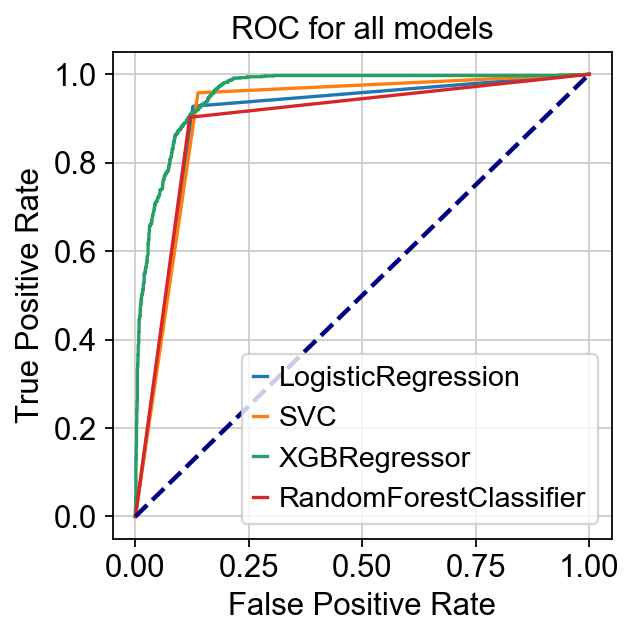

In [44]:
models = [LogisticRegression(max_iter=1000, random_state=551),SVC(gamma='scale', random_state=551),XGBRegressor(random_state=551),RandomForestClassifier(max_depth=100, random_state=551)]

perf = {}

model_names = []

auroc_val = []
fit=[None]*6
i=0
for model in models:
    fit[i] = model.fit(rbX_train, rbY_train)
    y_test_prob = fit[i].predict(rbX_test)
    fpr, tpr, _ = roc_curve(rbY_test, y_test_prob)
    auroc = roc_auc_score(rbY_test, y_test_prob)
    perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    auroc_val.append(auroc)
    i=i+1


plt.clf()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
    model_names.append(model_name)


plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()

In [75]:
selectt=['Rpl35', 'Rps27rt', 'Rpl9-ps6', 'Rps27', 'Uba52', 'Lars2', 'Gm42418', 'Uty', 'Kdm5d', 'Eif2s3y', 'Ddx3y', 'Xist','y']
rccut=rc.loc[:, selectt]
training_data = rccut.sample(frac=1, random_state=25)
X_train=training_data.drop(["y"],axis=1)
Y_train=training_data.loc[:,"y"]

columns_to_extract = ['Rpl35', 'Rps27rt', 'Rpl9-ps6', 'Rps27', 'Uba52', 'Lars2', 'Gm42418', 'Uty', 'Kdm5d', 'Eif2s3y', 'Ddx3y', 'Xist']
extracted_df = result[columns_to_extract]
 
extracted_df['gender']=result['gender']
realtest=extracted_df.drop('gender',axis=1)
realtest_y=result['gender']
realtest_y = realtest_y.astype('float') 
realtest_y
 

AAACCCAAGACAGCTG-1    1.0
AAACCCACAAAGACGC-1    1.0
AAACGAAAGCACTCGC-1    1.0
AAACGAACAAATGGTA-1    1.0
AAAGGATGTGTGTTTG-1    1.0
                     ... 
TTTGGTTCAGTGGCTC-1    0.0
TTTGGTTGTAACGTTC-1    0.0
TTTGGTTTCAGCGTCG-1    1.0
TTTGTTGGTACGTTCA-1    1.0
TTTGTTGGTCCACTCT-1    1.0
Name: gender, Length: 1649, dtype: float64

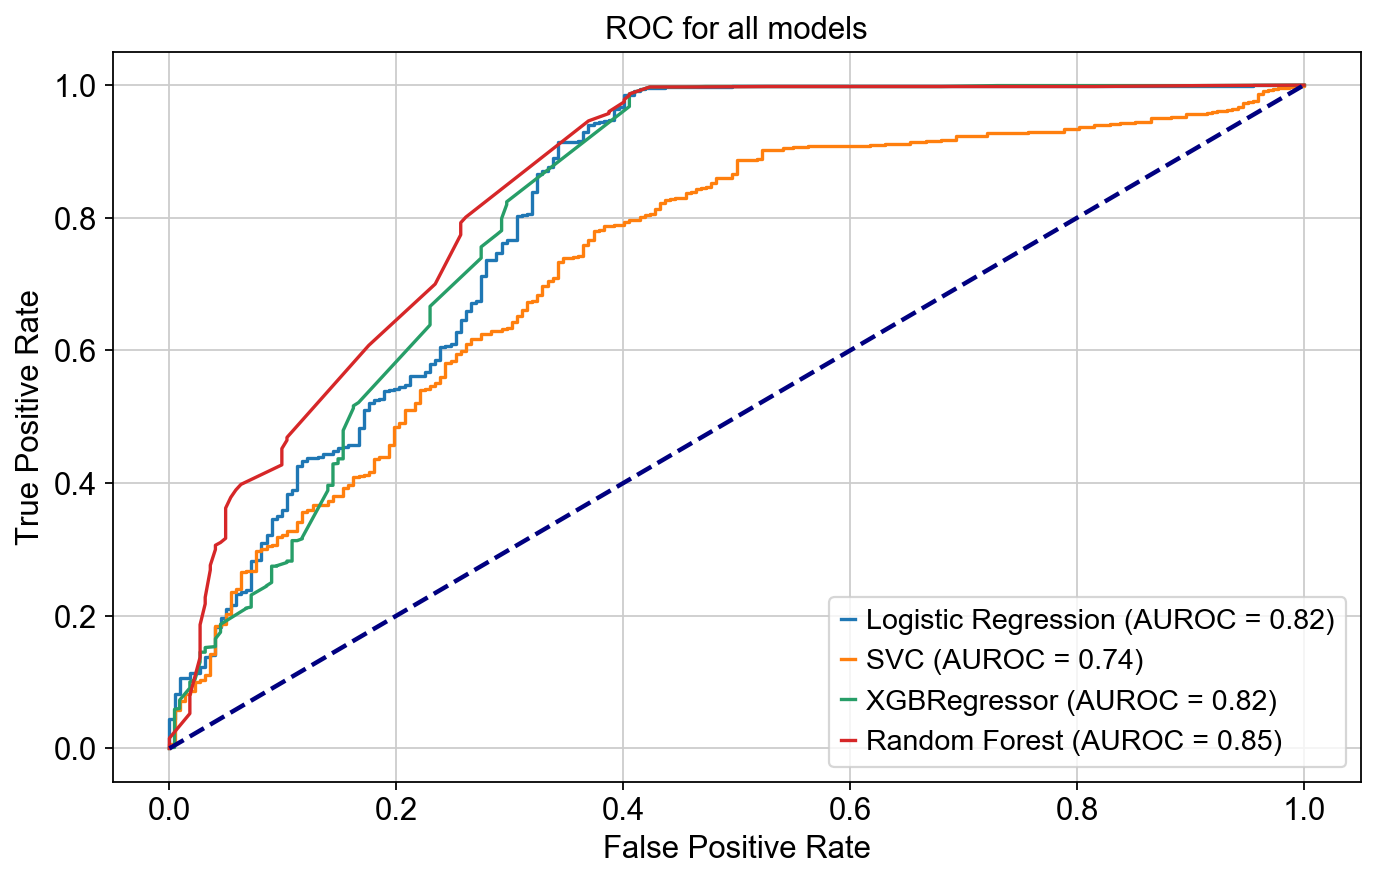

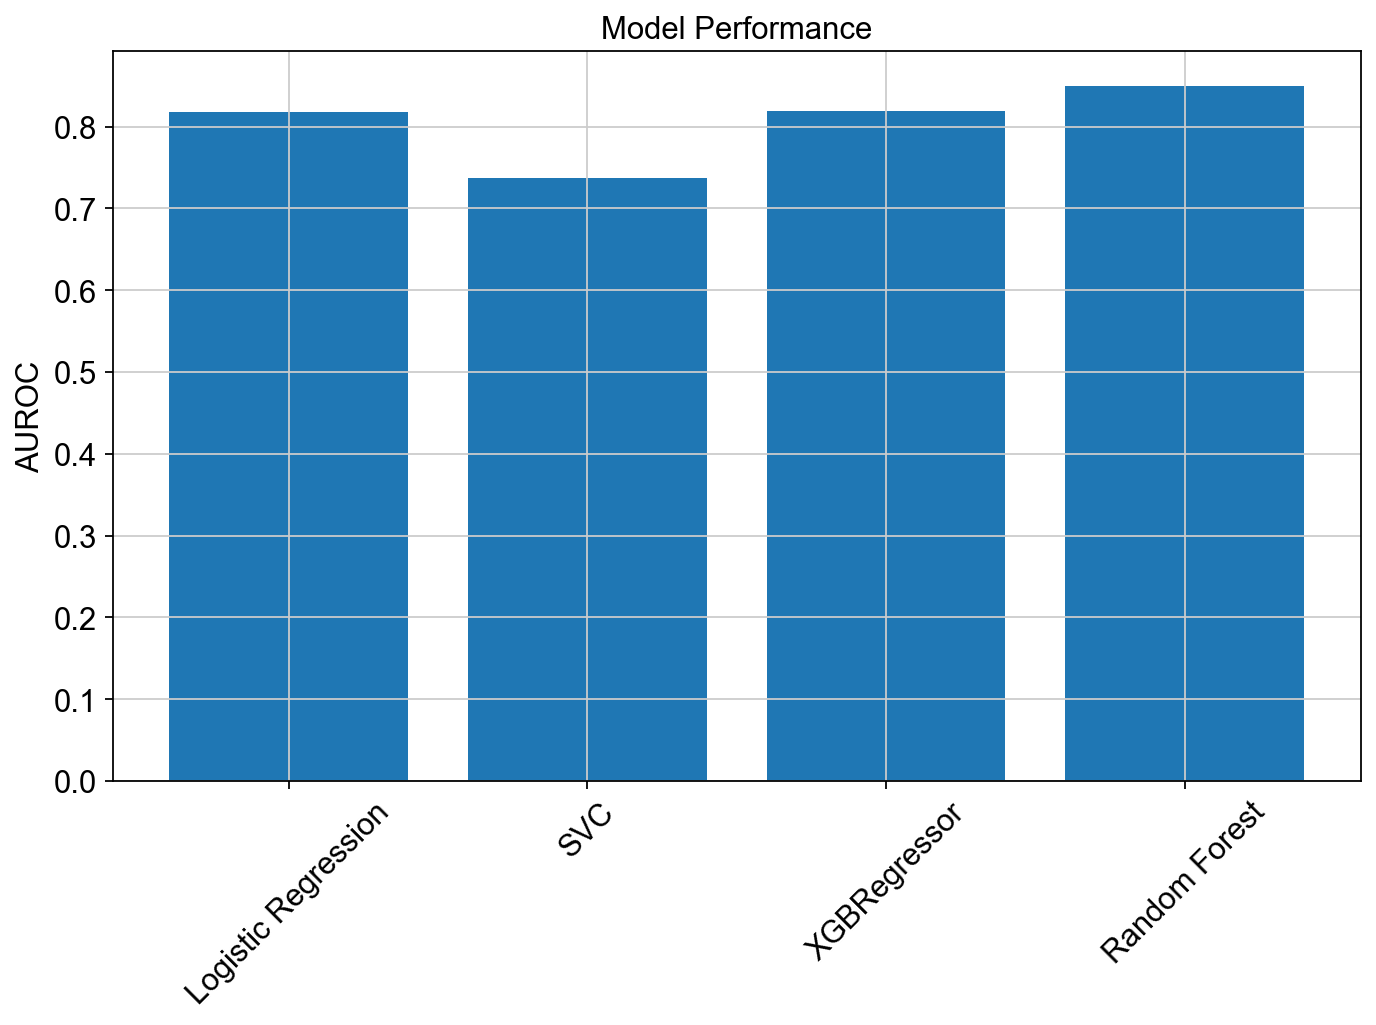

In [81]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming X_train, Y_train, realtest, realtest_y are defined

# Standardize the data
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# realtest_scaled = scaler.transform(realtest)
X_train_scaled =  (X_train)
realtest_scaled = (realtest)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=551),
    'SVC': SVC(gamma='scale', random_state=851, probability=True),
    'XGBRegressor': XGBRegressor(random_state=551),
    'Random Forest': RandomForestClassifier(max_depth=100, random_state=551)
}

perf = {}
auroc_val = []

# Loop through models and fit
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    
    if name == 'XGBRegressor':
        y_test_prob = model.predict(realtest_scaled)
    else:
        y_test_prob = model.predict_proba(realtest_scaled)[:, 1]
        
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[name] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)

# Plot ROC curve
plt.figure(figsize=(10, 6))
for name, p in perf.items():
    plt.plot(p['fpr'], p['tpr'], label=f"{name} (AUROC = {p['auroc']:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend(loc="lower right")
plt.show()

# Plot Bar graph for AUROC
plt.figure(figsize=(10, 6))
pos = np.arange(len(models.keys()))
plt.bar(pos, auroc_val, align='center')
plt.xticks(pos, models.keys(), rotation=45)
plt.ylabel('AUROC')
plt.title('Model Performance')
plt.show()


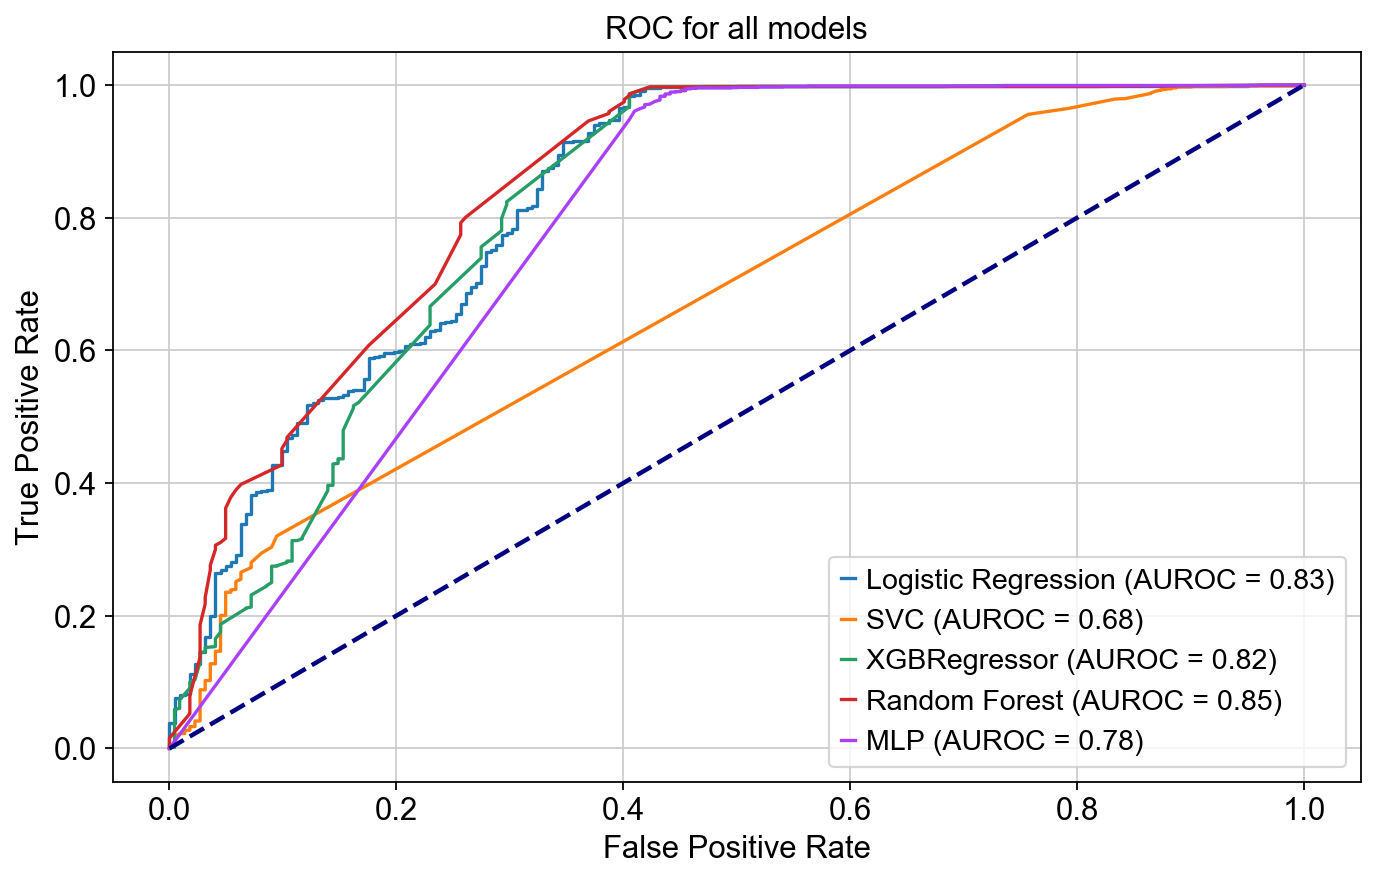

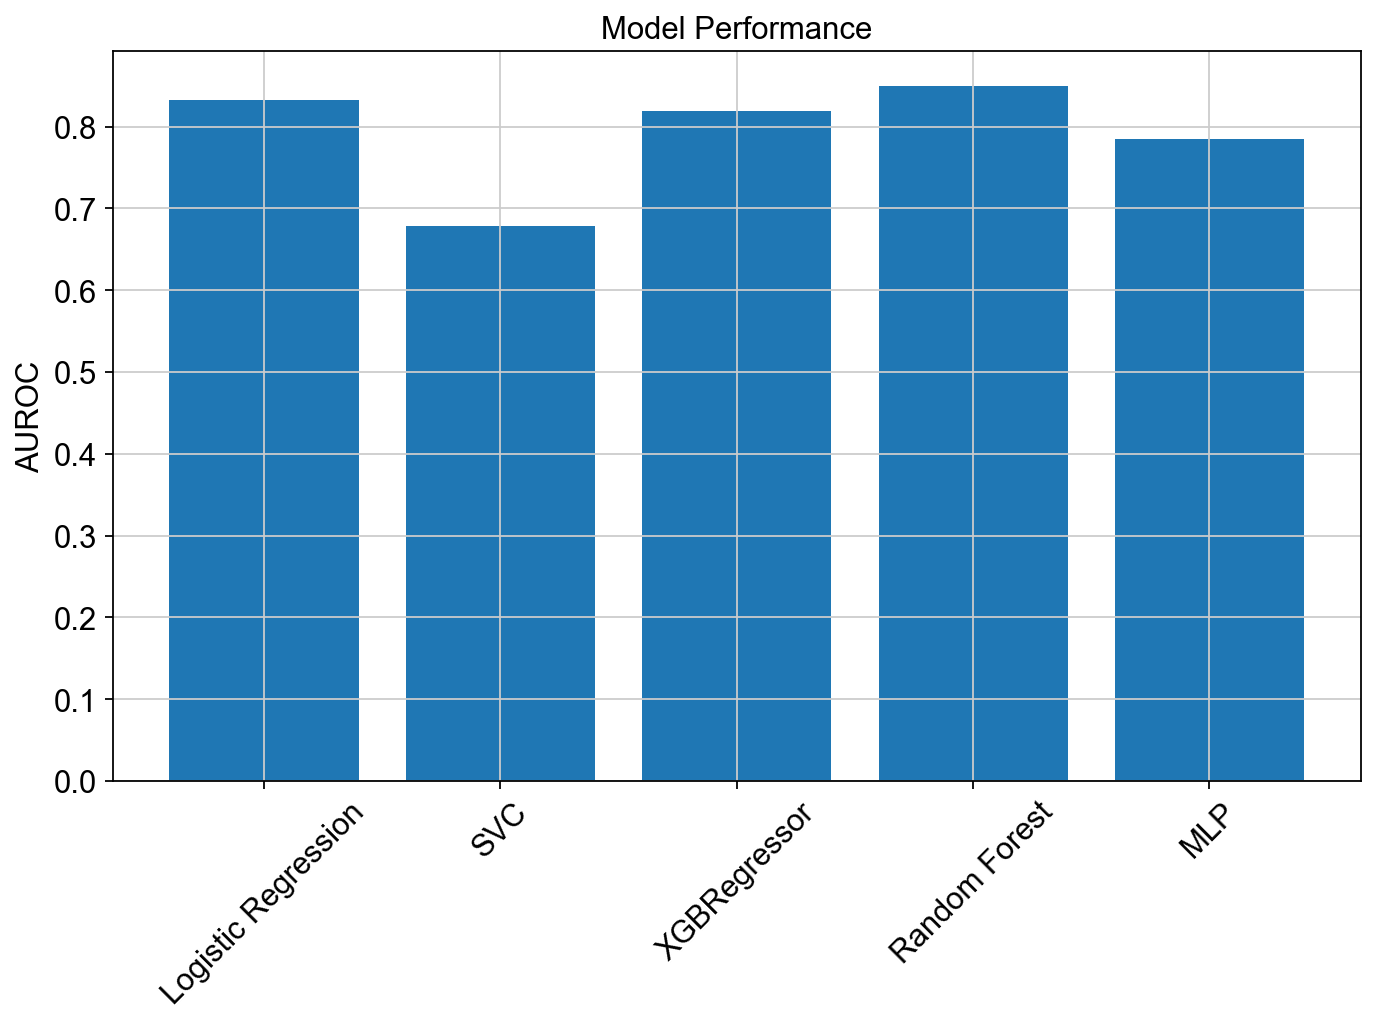

In [82]:
 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Assuming X_train, Y_train, realtest, realtest_y are defined

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
realtest_scaled = scaler.transform(realtest)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=551),
    'SVC': SVC(gamma='scale', random_state=851, probability=True),
    'XGBRegressor': XGBRegressor(random_state=551),
    'Random Forest': RandomForestClassifier(max_depth=100, random_state=551),
    'MLP': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

perf = {}
auroc_val = []

# Loop through models and fit
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    
    if name == 'XGBRegressor':
        y_test_prob = model.predict(realtest_scaled)
    else:
        y_test_prob = model.predict_proba(realtest_scaled)[:, 1]
        
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[name] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)

# Plot ROC curve
plt.figure(figsize=(10, 6))
for name, p in perf.items():
    plt.plot(p['fpr'], p['tpr'], label=f"{name} (AUROC = {p['auroc']:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend(loc="lower right")
plt.show()

# Plot Bar graph for AUROC
plt.figure(figsize=(10, 6))
pos = np.arange(len(models.keys()))
plt.bar(pos, auroc_val, align='center')
plt.xticks(pos, models.keys(), rotation=45)
plt.ylabel('AUROC')
plt.title('Model Performance')
plt.show()


In [79]:
# Assume the data is in DataFrame 'data' with features in 'X' and labels in 'y'
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
# Log-transform your features if it makes sense (after checking for non-positive values)
# X = np.log1p(X)

# Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Hyperparameter Grid
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [10, 50, 100]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    # add more model parameters here
}
# Voting Classifier (ensemble)
clf1 = RandomForestClassifier(random_state=1)
clf2 = SVC(probability=True, random_state=1)
clf3 = XGBClassifier(random_state=1)  # Use XGBClassifier here
clf4 = GradientBoostingClassifier(random_state=1)

eclf = VotingClassifier(estimators=[
        ('Random Forest', clf1), ('SVC', clf2), ('XGB', clf3), ('GBC', clf4)], 
        voting='soft')

# Fit the ensemble model
pipeline = Pipeline([('poly', poly), ('ensemble', eclf)])
pipeline.fit(X_train, Y_train)

# Evaluate (this can also be done within GridSearch)
y_pred_prob = pipeline.predict_proba(realtest)[:, 1]
auroc = roc_auc_score(realtest_y, y_pred_prob)
print(f"Ensemble AUROC: {auroc}")


Ensemble AUROC: 0.8349321641192698


In [72]:

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Generate a random matr
# Initialize the Scaler
scaler = MinMaxScaler()

# Fit and transform the matrix
take_test= scaler.fit_transform(realtest)


In [73]:
models = [LogisticRegression(max_iter=1000, random_state=551),SVC(gamma='scale', random_state=851),XGBRegressor(random_state=551),RandomForestClassifier(max_depth=100, random_state=551)]

perf = {}

model_names = []

auroc_val = []
fit=[None]*6
i=0
for model in models:
    fit[i] = model.fit(rbX_train, rbY_train)
    y_test_prob = fit[i].predict(take_test)
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    auroc_val.append(auroc)
    i=i+1


plt.clf()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
    model_names.append(model_name)


plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 20 features, but LogisticRegression is expecting 12 features as input.

[0 1 2 3]
[0.6829640269754209, 0.7144625957756129, 0.7516424887225628, 0.6986550547612175]
['LogisticRegression', 'SVC', 'XGBRegressor', 'RandomForestClassifier']


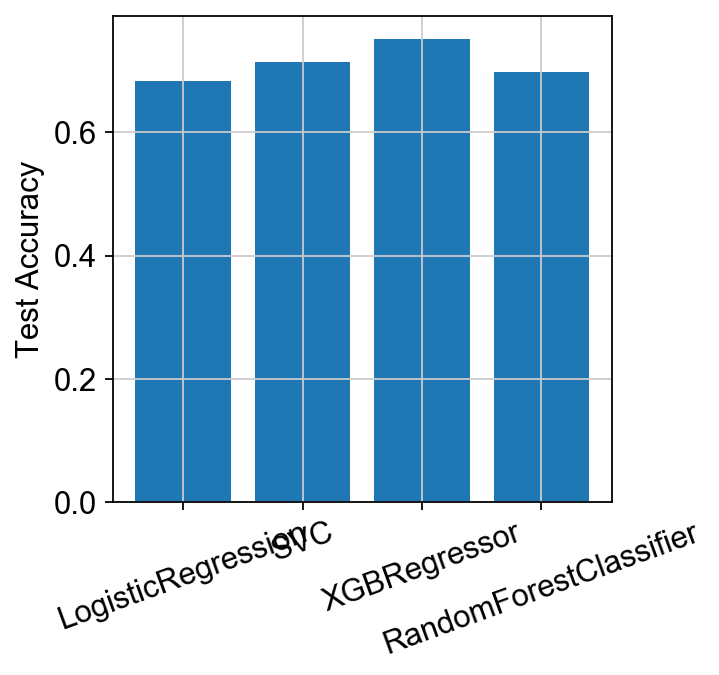

In [1409]:
pos = np.arange(len(model_names))
print(pos)
print(auroc_val)
print(model_names)
plt.bar(pos, auroc_val)
plt.ylabel('Test Accuracy')
plt.xticks(pos, model_names)
plt.xticks(rotation = 20)
plt.show()

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.4s
[CV] END colsampl

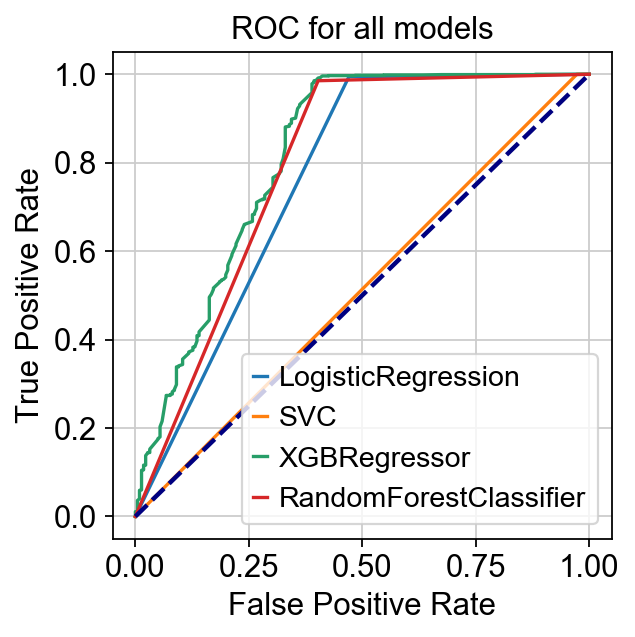

In [1410]:
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Create a dictionary to store performance metrics
perf = {}
model_names = []
auroc_val = []

# Initialize models
models = [
    LogisticRegression(max_iter=1000, random_state=551),
    SVC(gamma='scale', random_state=851),
    XGBRegressor(
        random_state=551,
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
    ),
    RandomForestClassifier(max_depth=100, random_state=551),
]

# For XGBRegressor, you can tune hyperparameters using GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

xgb_model = XGBRegressor(random_state=551)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(rbX_train, rbY_train)
best_xgb_model = grid_search.best_estimator_

models[2] = best_xgb_model  # Replace the original XGBRegressor model with the tuned one

# Train and evaluate models
for i, model in enumerate(models):
    model.fit(rbX_train, rbY_train)
    y_test_prob = model.predict(realtest)
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)

# Plot ROC curve
plt.clf()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()
plt.show()


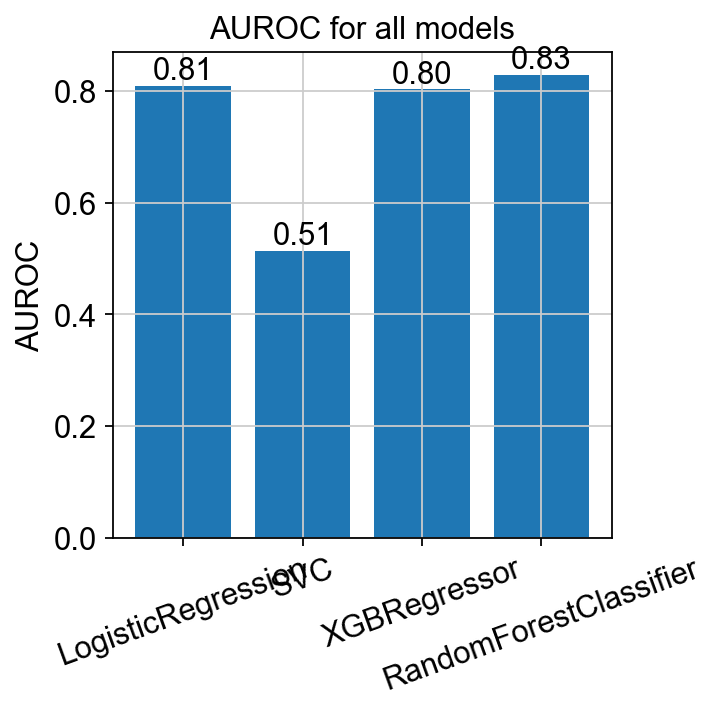

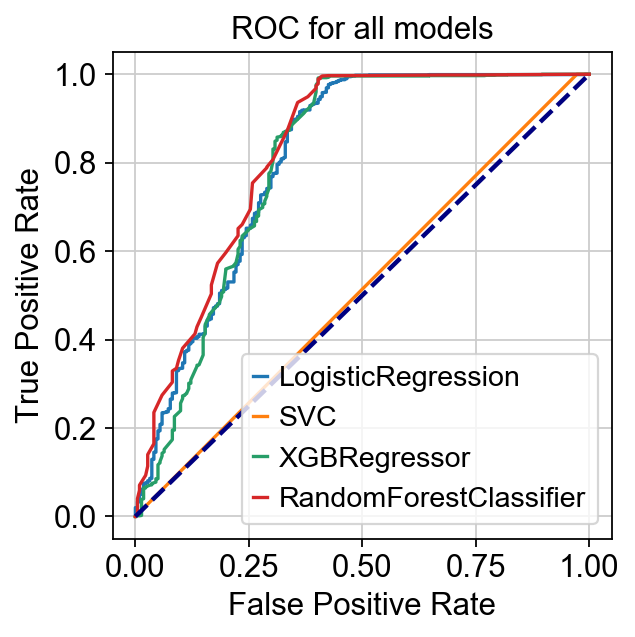

In [1411]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
models = [
    LogisticRegression(max_iter=1000, random_state=551),
    SVC(gamma='scale', random_state=851),
    XGBRegressor(random_state=551),
    RandomForestClassifier(max_depth=100, random_state=551)
]

# Create dictionaries for performance metrics
perf = {}
model_names = []
auroc_val = []

# Train and evaluate models
for model in models:
    model.fit(rbX_train, rbY_train)
    y_test_prob = model.predict(realtest)
    
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(realtest)[:, 1]

    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)
    model_names.append(type(model).__name__)


# Create bar plot for AUROC values
plt.figure()
bars = plt.bar(pos, auroc_val)
plt.ylabel('AUROC')
plt.xticks(pos, model_names)
plt.xticks(rotation = 20)
plt.title('AUROC for all models')

# Add the data value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# Create ROC curve plot
plt.figure()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()
plt.show()


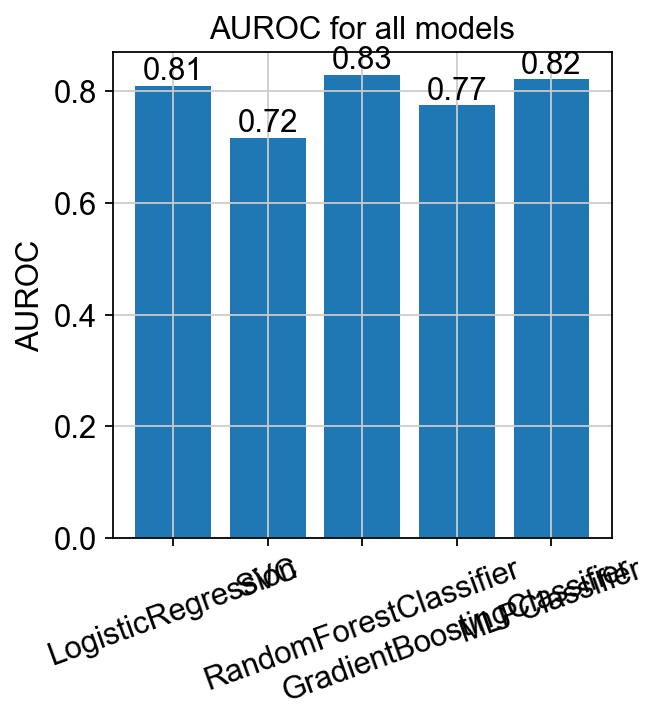

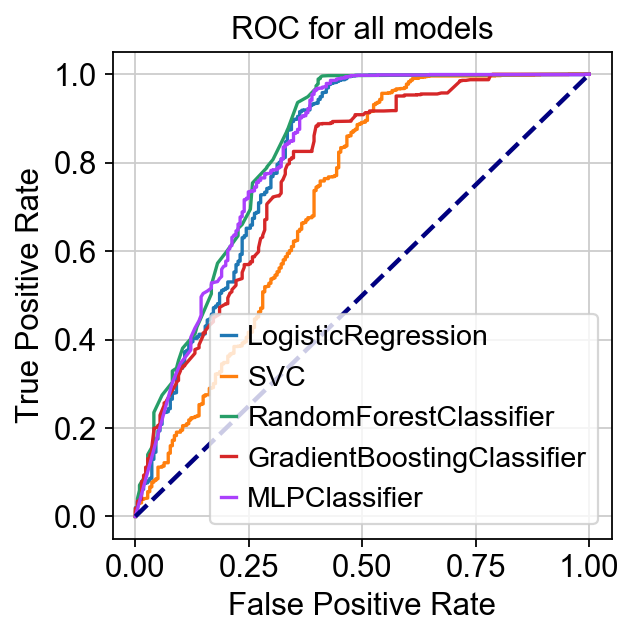

In [1412]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
models = [
    LogisticRegression(max_iter=1000, random_state=551),
    SVC(gamma='scale', random_state=851, probability=True),
 
    RandomForestClassifier(max_depth=100, random_state=551),
    
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=551),
    MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=551)  # Neural Network

]

# Add ensemble model
 

# Create dictionaries for performance metrics
perf = {}
model_names = []
auroc_val = []

# Train and evaluate models
for model in models:
    model.fit(rbX_train, rbY_train)
    
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(realtest)[:, 1]
    else:
        y_test_prob = model.decision_function(realtest)  # For models like SVM that do not have predict_proba
    
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)
    model_names.append(type(model).__name__)

# Bar plot for AUROC values
plt.figure()
pos = np.arange(len(model_names))
bars = plt.bar(pos, auroc_val)
plt.ylabel('AUROC')
plt.xticks(pos, model_names)
plt.xticks(rotation=20)
plt.title('AUROC for all models')

# Add the data value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# ROC curve plot
plt.figure()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()
plt.show()


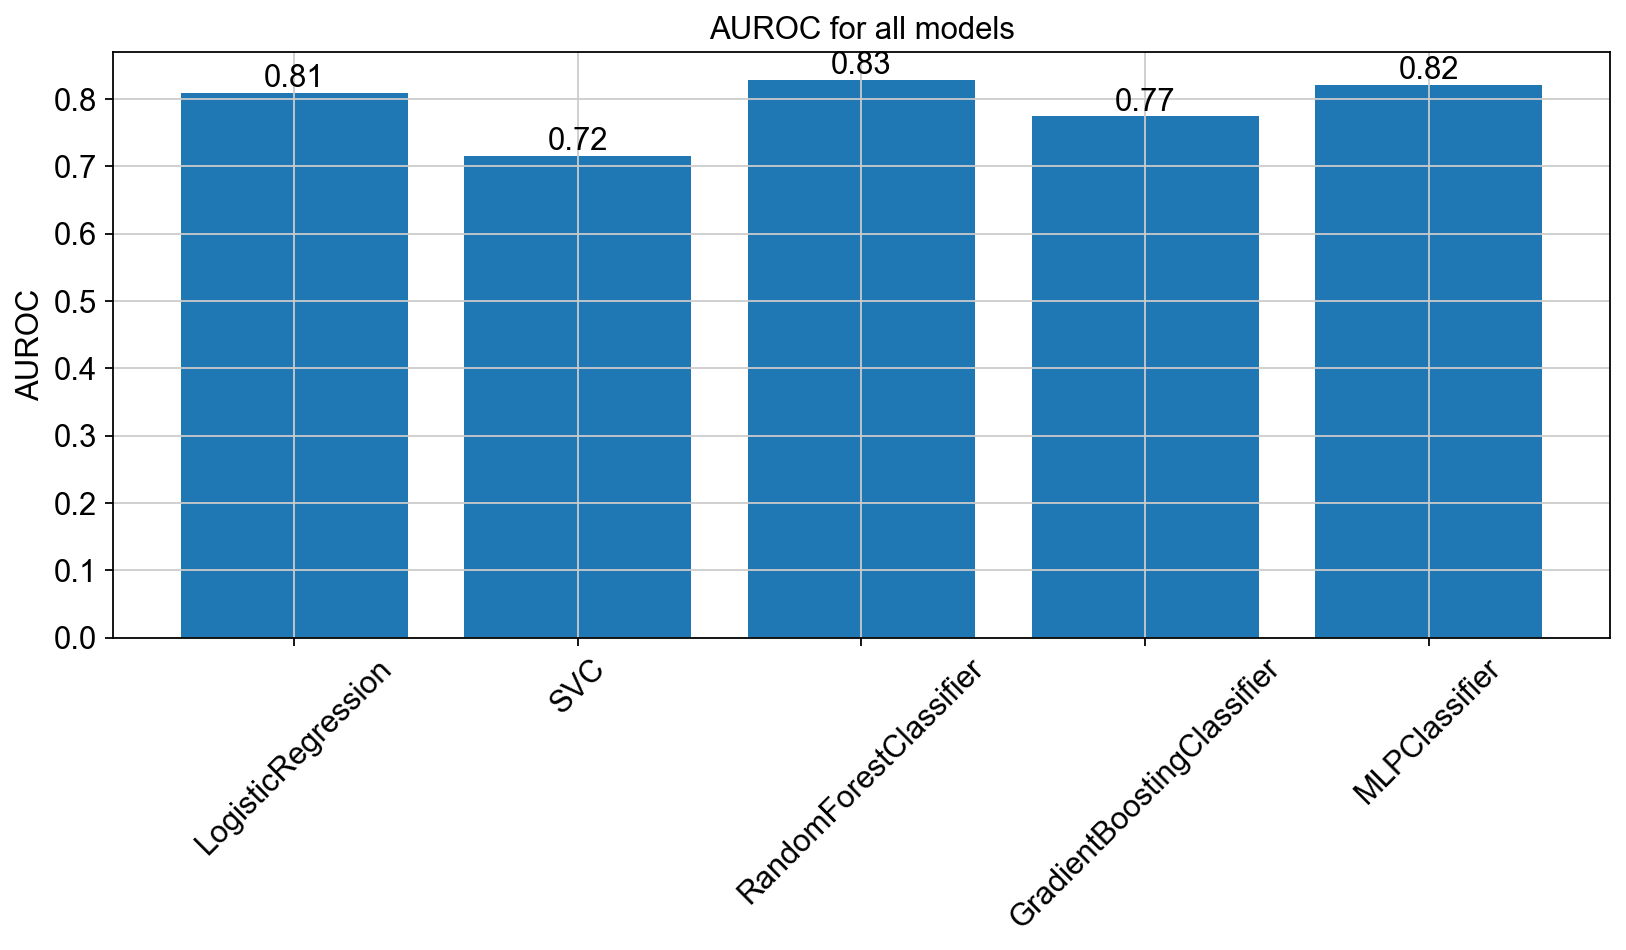

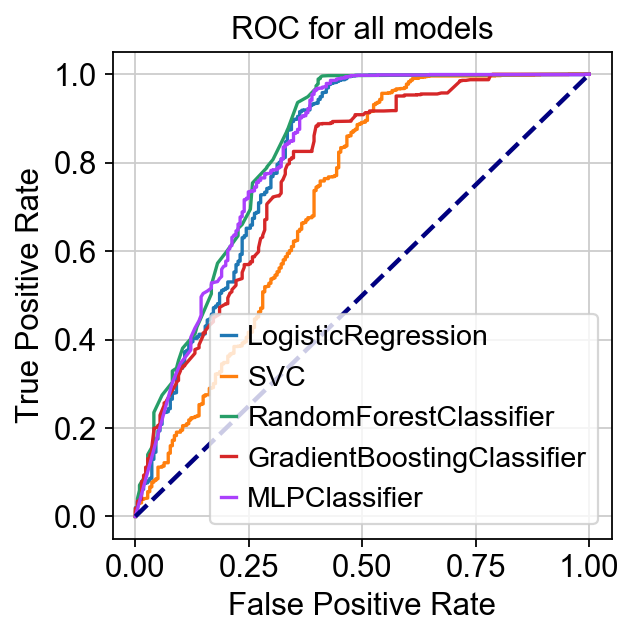

In [1413]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
models = [
    LogisticRegression(max_iter=1000, random_state=551),
    SVC(gamma='scale', random_state=851, probability=True),
    RandomForestClassifier(max_depth=100, random_state=551),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=551),
    MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=551)  # Neural Network
]

# Create dictionaries for performance metrics
perf = {}
model_names = []
auroc_val = []

# Train and evaluate models
for model in models:
    model.fit(rbX_train, rbY_train)
    
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(realtest)[:, 1]
    else:
        y_test_prob = model.decision_function(realtest)
    
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)
    model_names.append(type(model).__name__)

# Bar plot for AUROC values with modified layout
plt.figure(figsize=(12, 6))
pos = np.arange(len(model_names))
bars = plt.bar(pos, auroc_val)
plt.ylabel('AUROC')
plt.xticks(pos, model_names)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.subplots_adjust(bottom=0.3)  # Add extra space at the bottom
plt.title('AUROC for all models')

# Add the data value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# ROC curve plot
plt.figure()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()
plt.show()


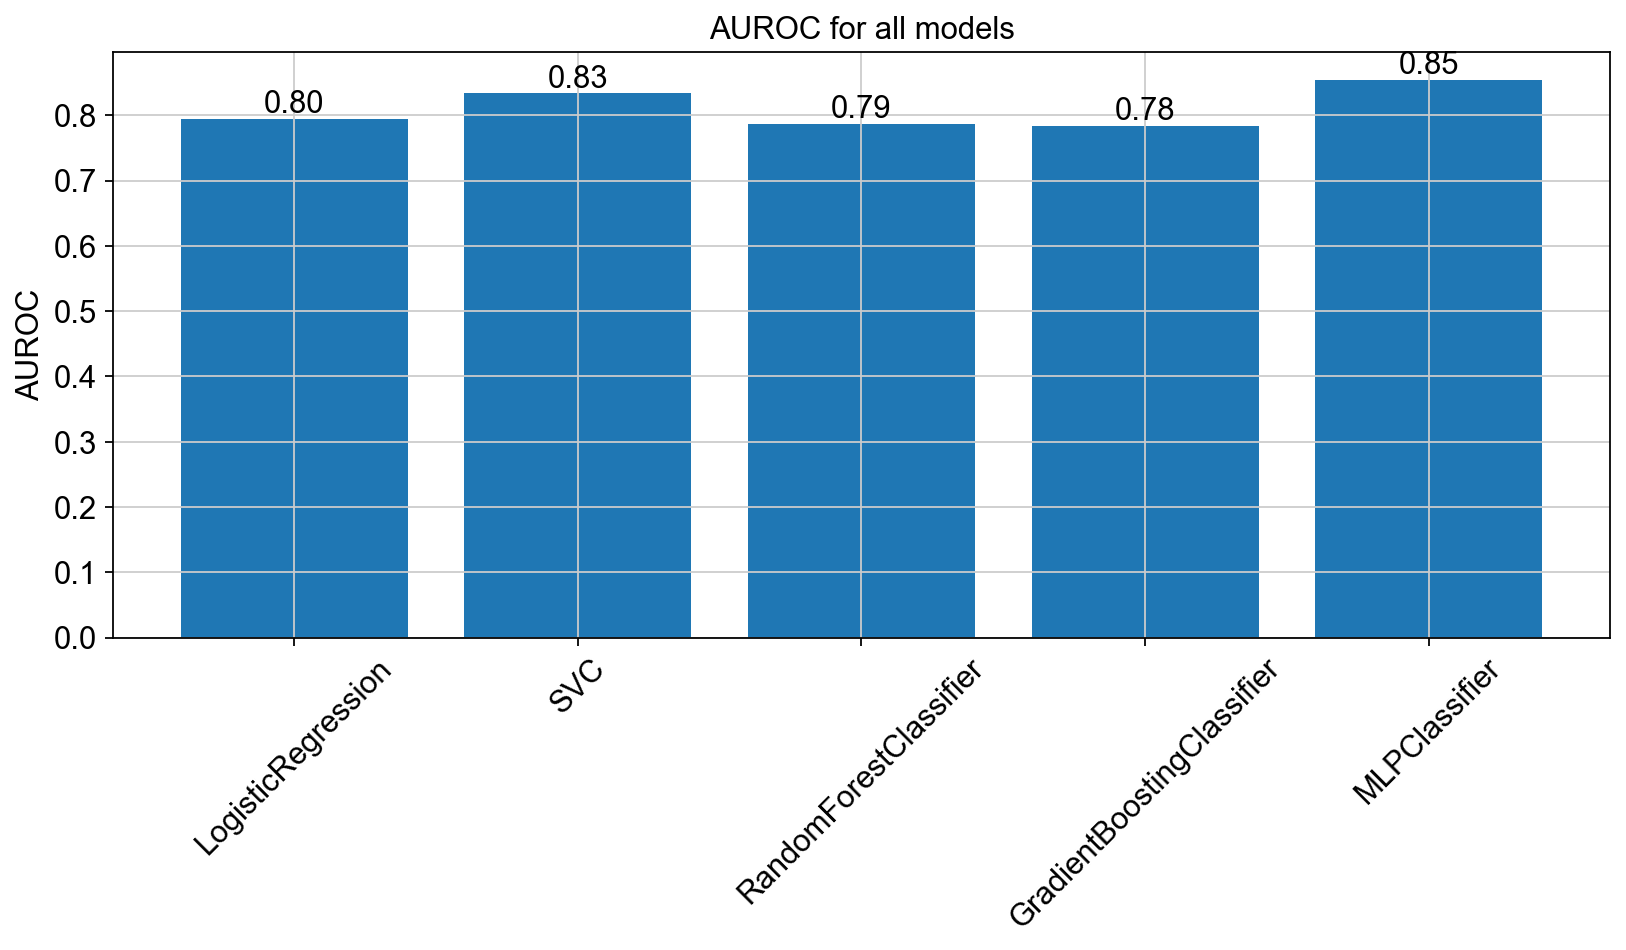

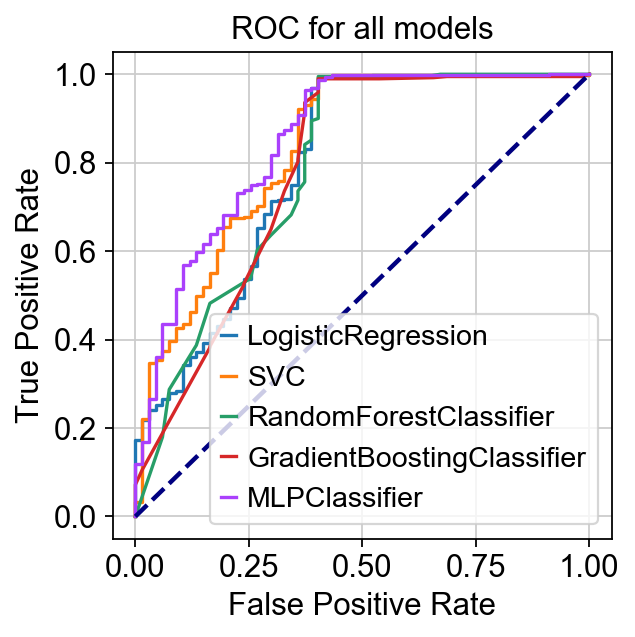

In [1414]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Split 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(realtest, realtest_y, test_size=0.3, random_state=42)

# Initialize models
models = [
    LogisticRegression(max_iter=1000, random_state=551),
    SVC(gamma='scale', random_state=851, probability=True),
    RandomForestClassifier(max_depth=100, random_state=551),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=551),
    MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=551)  # Neural Network
]

# Create dictionaries for performance metrics
perf = {}
model_names = []
auroc_val = []

# Train and evaluate models
for model in models:
    model.fit(X_train, y_train)
    
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_test_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    auroc = roc_auc_score(y_test, y_test_prob)
    perf[type(model).__name__] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)
    model_names.append(type(model).__name__)

# Bar plot for AUROC values
plt.figure(figsize=(12, 6))
pos = np.arange(len(model_names))
bars = plt.bar(pos, auroc_val)
plt.ylabel('AUROC')
plt.xticks(pos, model_names)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.3)
plt.title('AUROC for all models')

# Add the data value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# ROC curve plot
plt.figure()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()
plt.show()
